<h1 style="font-size:44px">Student Grade Prediction</h1>

<p><b>Note:</b> For better code visualization, use Jupyter Notebook.</p>



## Dataset Description:

| Column Name | Description |
|-------------|-------------|
| school | Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) |
| sex | Student's sex (binary: 'F' - female or 'M' - male) |
| age | Student's age (numeric: from 15 to 22) |
| address | Student's home address type (binary: 'U' - urban or 'R' - rural) |
| famsize | Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) |
| Pstatus | Parent's cohabitation status (binary: 'T' - living together or 'A' - apart) |
| Medu | Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education) |
| Fedu | Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education) |
| Mjob | Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') |
| Fjob | Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') |
| reason | Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') |
| guardian | Student's guardian (nominal: 'mother', 'father' or 'other') |
| traveltime | Home to school travel time (numeric: 1 - less than 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - more than 1 hour) |
| studytime | Weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours) |
| failures | Number of past class failures (numeric: n if between 1 and 3, else 4) |
| schoolsup | Extra educational support (binary: yes or no) |
| famsup | Family educational support (binary: yes or no) |
| paid | Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) |
| activities | Extra-curricular activities (binary: yes or no) |
| nursery | Attended nursery school (binary: yes or no) |
| higher | Wants to take higher education (binary: yes or no) |
| internet | Internet access at home (binary: yes or no) |
| romantic | With a romantic relationship (binary: yes or no) |
| famrel | Quality of family relationships (numeric: from 1 - very bad to 5 - excellent) |
| freetime | Free time after school (numeric: from 1 - very low to 5 - very high) |
| goout | Going out with friends (numeric: from 1 - very low to 5 - very high) |
| Dalc | Workday alcohol consumption (numeric: from 1 - very low to 5 - very high) |
| Walc | Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) |
| health | Current health status (numeric: from 1 - very bad to 5 - very good) |
| absences | Number of school absences (numeric: from 0 to 93) |
| G1 | First period grade (numeric: from 0 to 20) |
| G2 | Second period grade (numeric: from 0 to 20) |
| G3 | Final grade (numeric: from 0 to 20, output target) |


<a id="contents_tabel"></a>

## 📚 Table of Content
<br>

<span style="font-size: 1.2em;line-height:1.3em">
    
    
- **[1 | Import Libraries](#l)** 📦
- **[2 | Read Dataset](#2)** 🗂️
- **[3 | Dataset Overview](#3)** 📊
    - **[3.1 | Remove irrelevant Column](#3.1)** 🔍
    - **[3.2 | Summary Statistics for Numerical Features](#3.2)** 📈
    - **[3.3 | Summary Statistics for Categorical Features](#3.3)** 📉
- **[4 | Univariate Analysis](#4)** 📊
    - **[4.1 | Numerical Features](#4.1)** 📈
    - **[4.2 | Categorical Features](#4.2)** 📉
- **[5 | Bivariate Analysis](#5)** 📊
    - **[5.1 | Target vs Numerical Features](#5.1)** 📈
    - **[5.2 | Target vs Categorical Features](#5.2)** 📉
- **[6 | Data Preprocessing](#6)** 🛠️
    - **[6.1 | Handle Missing Values](#6.1)** 🧹
    - **[6.2 | Duplicate Data](#6.2)** 🔄
    - **[6.3 | Outlier Treatment](#6.3)** 🚫
    - **[6.4 | Encode Categorical Variables](#6.4)** 🏷️
- **[7 | Correlation Analysis](#7)** 📊
- **[8 | Build Linear Regression Model](#8)** 🛠️
    - **[8.1 | Determine Features & Target Variables](#8.1)** 🧪
    - **[8.2 | Split Dataset to Training & Test Sets](#8.2)** 🧾
    - **[8.3 | Apply Box-Cox Transformation](#8.3)** 🔄
    - **[8.4 | Scale Data using Standard Scaler](#8.4)** 📏
    - **[8.5 | Train the Model](#8.5)** 🚂
    - **[8.6 | Model Evaluation](#8.6)** 📊
- **[9 | Feature Selection - RFECV](#9)** 🧐
- **[10 | Conclusion](#10)** 📝


<a id="1"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">1 | Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox

<a id="2"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">2 | Read Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
df = pd.read_csv("student.csv")

<a id="3"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">3 | Dataset Overview</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [3]:
pd.set_option('display.max_columns', len(df.columns))

In [4]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


<a id="3.1"></a>
# <b><span style='color:#333'>3.1 |</span><span style='color:#00008B'> Remove irrelevant column</span></b>

In [5]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.shape

(395, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    
<h2>Inference:</h2>
    <p>The dataset consists of <b>33 columns and 395 rows</b>, each representing different attributes related to students' academic and personal information. The target variable for prediction is <code>G3 (final grade)</code>.</p>
    <p><b>Non-Null Count</b><br>
All columns have 395 non-null entries, indicating that there are no missing values in the dataset. This ensures that no data imputation is necessary for this dataset.</p>
    

<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>Note 📝:</h3>
    Based on the data types and the feature explanations provided earlier, we identified that 11 features (<b>Medu</b>,<b>Fedu</b>, <b>traveltime</b>, <b>studytime</b>, <b>failures</b>, <b>famrel</b>, <b>freetime</b>, <b>goout</b>, <b>Dalc</b>, <b>Walc</b> and <b>health</b>) are categorical in terms of their semantics. These features must have string (object) data type to ensure proper analysis and interpretation in subsequent steps:
</div>

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <p>Since the feature are encoded correctly, we will create a copy of this dataframe for analysis, later we will use the original for data preprocessing</p>

In [8]:
df1 = df.copy()

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
categorical_columns_semantics = ['Medu', 'Fedu','traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


# Convert these columns to string (object) data type
for column in categorical_columns_semantics:
    if column in df1.columns:
        df1[column] = df1[column].astype(str)

# Verify the changes in data types
df1.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

<a id="3.2"></a>
# <b><span style='color:#333'>3.2 |</span><span style='color:#00008B'> Summary Statistics for Numerical Features</span></b>

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    
<h2>Inference:</h2>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Age:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average age of students is approximately <b>16.70 years</b>, with a standard deviation of <b>1.28 years</b>. This indicates most students are in their late teens.</li>
                <li>The age range is from <b>15</b> to <b>22 years</b>, with the majority being between <b>16</b> and <b>18 years</b>.</li>
            </ul>
        </li>
        <li><b>Absences:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average number of absences is approximately <b>5.71</b>, with a standard deviation of <b>8.00</b>. This signifies a wide variation in attendance.</li>
                <li>Absences range from <b>0</b> to <b>75</b>, with many students having no absences, and the 75th percentile at <b>8</b>.</li>
            </ul>
        </li>
        <li><b>First Period Grade (G1):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average first period grade is approximately <b>10.91</b>, with a standard deviation of <b>3.32</b>. This indicates moderate variability in the initial academic performance.</li>
                <li>Grades range from <b>3</b> to <b>19</b>, with a median of <b>11</b> and most grades falling between <b>8</b> and <b>13</b>.</li>
            </ul>
        </li>
        <li><b>Second Period Grade (G2):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average second period grade is approximately <b>10.71</b>, with a standard deviation of <b>3.76</b>. This signifies a slight decline from G1.</li>
                <li>Grades range from <b>0</b> to <b>19</b>, with a median of <b>11</b> and a 75th percentile of <b>13</b>. There are notable low scores including zeros.</li>
            </ul>
        </li>
        <li><b>Final Grade (G3):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average final grade is approximately <b>10.42</b>, with a standard deviation of <b>4.58</b>. This shows significant variability in the final academic outcomes.</li>
                <li>Final grades range from <b>0</b> to <b>20</b>, with a median of <b>11</b> and a 75th percentile of <b>14</b>. Some students achieved the highest possible score while others scored very low.</li>
            </ul>
        </li>
    </ul>
</div>


<a id="3.3"></a>
# <b><span style='color:#333'>3.3 |</span><span style='color:#00008B'>  Summary Statistics for Categorical Features</span></b>

In [12]:
df1.describe(include="object")

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,5,5,4,3,4,4,4,2,2,2,2,2,2,2,2,5,5,5,5,5,5
top,GP,F,U,GT3,T,4,2,other,other,course,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5
freq,349,208,307,281,354,131,115,141,217,145,273,257,198,312,344,242,214,201,314,375,329,263,195,157,130,276,151,146


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h2>Inference</h2>:
    <ul style="list-style-type: square; color: #004085;">
        <li><b>School:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The dataset includes students from <b>2</b> schools, with <b>GP</b> being the most common school, appearing <b>349</b> times.</li>
            </ul>
        </li>
        <li><b>Sex:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>There are <b>2</b> unique values for sex, with <b>F</b> (female) being the most frequent, occurring <b>208</b> times.</li>
            </ul>
        </li>
        <li><b>Address:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The address type is divided into urban (<b>U</b>) and rural (<b>R</b>), with <b>U</b> being the majority at <b>307</b> instances.</li>
            </ul>
        </li>
        <li><b>Famsize:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Family size is categorized as <=3 (<b>LE3</b>) or >3 (<b>GT3</b>), with <b>GT3</b> being the most common, occurring <b>281</b> times.</li>
            </ul>
        </li>
        <li><b>Pstatus:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Parent's cohabitation status is categorized as living together (<b>T</b>) or apart (<b>A</b>), with <b>T</b> being the majority at <b>354</b> instances.</li>
            </ul>
        </li>
        <li><b>Medu:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Mother's education level ranges from 0 to 4, with the majority having a level of <b>4</b> (higher education), occurring <b>131</b> times.</li>
            </ul>
        </li>
        <li><b>Fedu:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Father's education level ranges from 0 to 4, with the majority having a level of <b>2</b> (5th to 9th grade), occurring <b>115</b> times.</li>
            </ul>
        </li>
        <li><b>Mjob:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Mother's job has <b>5</b> unique categories, with <b>other</b> being the most common, occurring <b>141</b> times.</li>
            </ul>
        </li>
        <li><b>Fjob:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Father's job has <b>5</b> unique categories, with <b>other</b> being the most common, occurring <b>217</b> times.</li>
            </ul>
        </li>
        <li><b>Reason:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The reason for choosing the school has <b>4</b> unique categories, with <b>course</b> being the most common, occurring <b>145</b> times.</li>
            </ul>
        </li>
        <li><b>Guardian:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Student's guardian is primarily the <b>mother</b>, occurring <b>273</b> times.</li>
            </ul>
        </li>
        <li><b>Traveltime:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Home to school travel time ranges from 1 to 4, with the majority taking <b>1</b> (less than 15 min.), occurring <b>257</b> times.</li>
            </ul>
        </li>
        <li><b>Studytime:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Weekly study time ranges from 1 to 4, with the majority studying for <b>2</b> hours, occurring <b>198</b> times.</li>
            </ul>
        </li>
                <li><b>Failures:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Number of past class failures ranges from 0 to 3, with the majority having <b>0</b> failures, occurring <b>312</b> times.</li>
            </ul>
        </li>
        <li><b>Schoolsup:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Extra educational support is provided to <b>no</b> for the majority of students, occurring <b>344</b> times.</li>
            </ul>
        </li>
        <li><b>Famsup:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Family educational support is provided to <b>yes</b> for the majority of students, occurring <b>242</b> times.</li>
            </ul>
        </li>
        <li><b>Paid:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Extra paid classes within the course subject are attended by <b>no</b> for the majority of students, occurring <b>214</b> times.</li>
            </ul>
        </li>
        <li><b>Activities:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Participation in extra-curricular activities is <b>yes</b> for the majority of students, occurring <b>201</b> times.</li>
            </ul>
        </li>
        <li><b>Nursery:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Attended nursery school is <b>yes</b> for the majority of students, occurring <b>314</b> times.</li>
            </ul>
        </li>
        <li><b>Higher:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Desire for higher education is <b>yes</b> for the majority of students, occurring <b>375</b> times.</li>
            </ul>
        </li>
        <li><b>Internet:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Internet access at home is <b>yes</b> for the majority of students, occurring <b>329</b> times.</li>
            </ul>
        </li>
        <li><b>Romantic:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Presence of romantic relationship is <b>no</b> for the majority of students, occurring <b>263</b> times.</li>
            </ul>
        </li>
        <li><b>Famrel:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Quality of family relationships ranges from 1 to 5, with the majority being <b>4</b> (good), occurring <b>195</b> times.</li>
            </ul>
        </li>
        <li><b>Freetime:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Free time after school ranges from 1 to 5, with the majority having <b>3</b> (average), occurring <b>157</b> times.</li>
            </ul>
        </li>
        <li><b>Goout:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Going out with friends ranges from 1 to 5, with the majority going out <b>3</b> (average), occurring <b>130</b> times.</li>
            </ul>
        </li>
        <li><b>Dalc:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Workday alcohol consumption ranges from 1 to 5, with the majority having <b>1</b> (very low), occurring <b>276</b> times.</li>
            </ul>
        </li>
        <li><b>Walc:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Weekend alcohol consumption ranges from 1 to 5, with the majority having <b>1</b> (very low), occurring <b>151</b> times.</li>
            </ul>
        </li>
                <li><b>Health:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Current health status ranges from 1 to 5, with the majority being <b>5</b> (very good), occurring <b>146</b> times.</li>
            </ul>
        </li>
    </ul>
</div>







        
    


<a id="4"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">4 | Univariate Analysis</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [13]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#e8e9eb'}, style='darkgrid')


<a id="4.1"></a>
# <b><span style='color:#333'>4.1 |</span><span style='color:#00008B'>  Numerical Features</span></b>

In [14]:
continuous_features = list(df1.describe().columns)
continuous_features

['age', 'absences', 'G1', 'G2', 'G3']

In [15]:
df_continuous = df1[continuous_features]

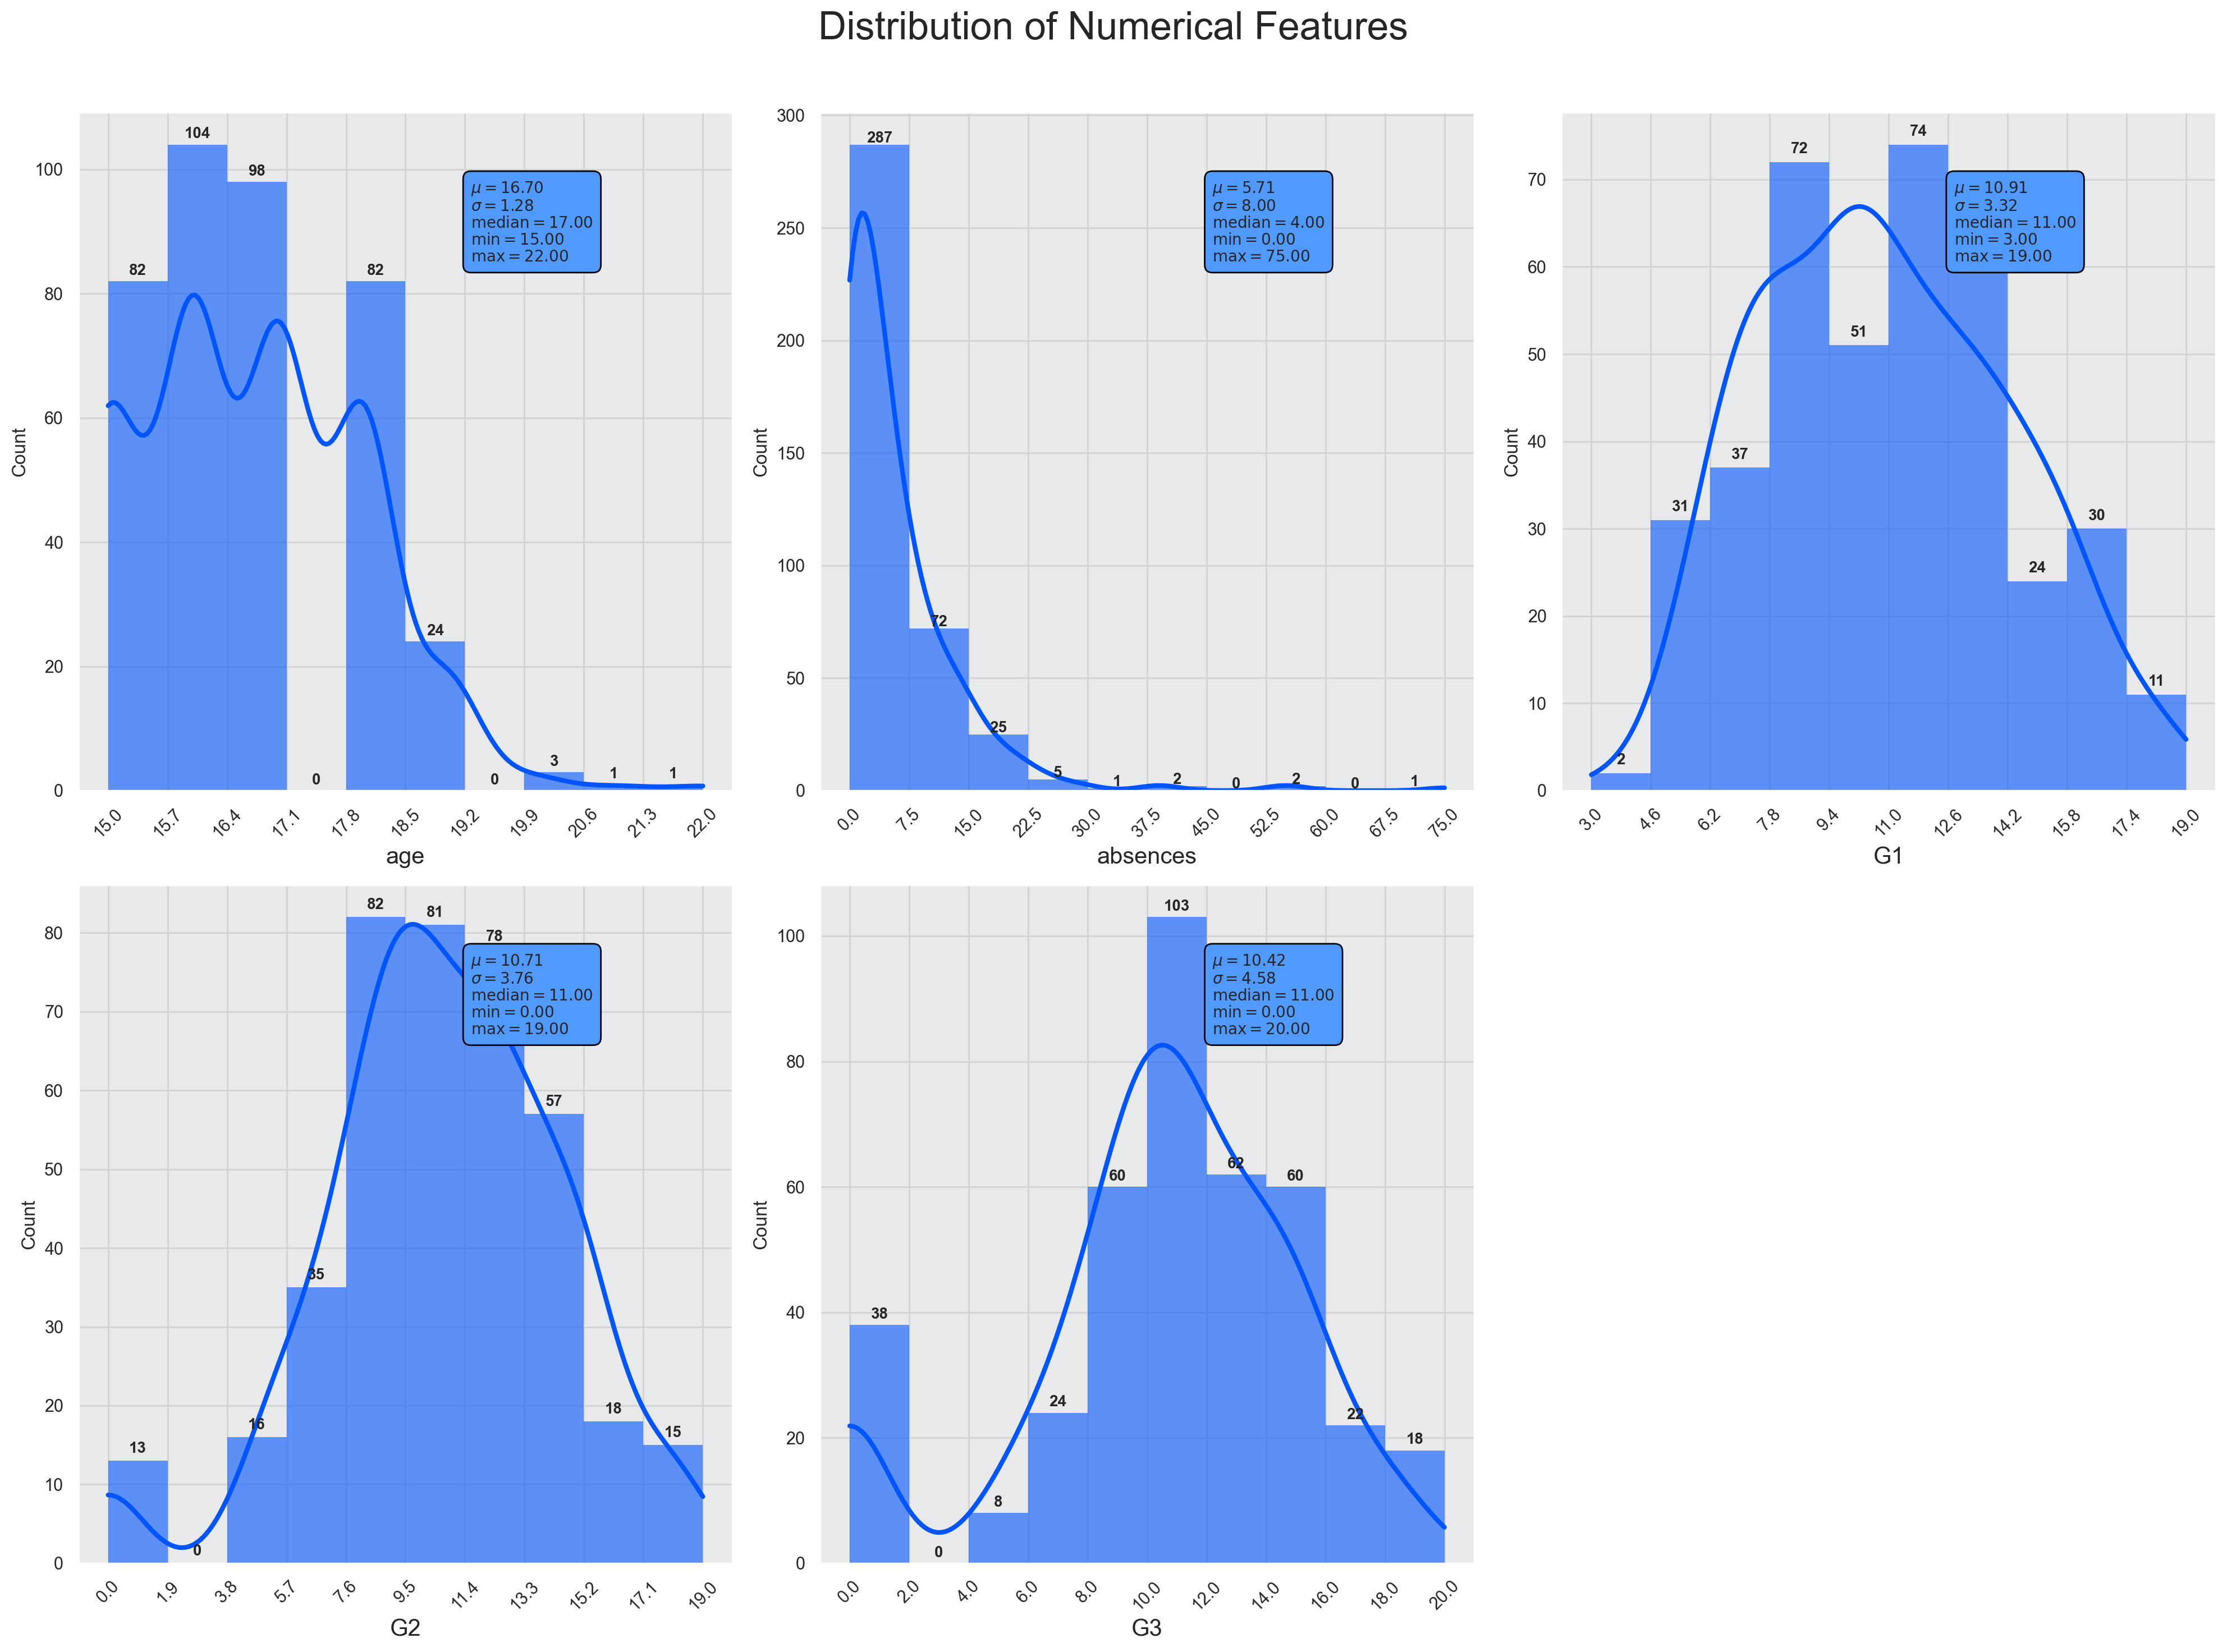

In [16]:
# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='#0055ff', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[continuous_features[i]].mean(),
    r'$\sigma=%.2f$' %df1[continuous_features[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[continuous_features[i]]),
    r'$\mathrm{min}=%.2f$' %df1[continuous_features[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[continuous_features[i]].max()
    ))
    ax[x,y].text(0.6, 0.9, textstr, transform=ax[x,y].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Numerical Features', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h2>Inference:</h2>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Age:</b>
            Right-skewed distribution with a peak at 16, suggesting that most students are around 16 years old.</li>
        <li><b>Absences:</b>
            Right-skewed distribution with a peak close to 0, suggesting that most students have very few absences, indicating regular attendance.</li>
        <li><b>G1, G2 & G3:</b>
            These features follow somewhat normal distributions, indicating a spread of grades across the dataset.</li>
    </ul>
</div>


<a id="4.2"></a>
# <b><span style='color:#333'>4.2 |</span><span style='color:#00008B'>  Categorical Features</span></b>

In [17]:
categorical_col = list(df1.describe(include='object').columns)

In [18]:
df_cat = df1[categorical_col]

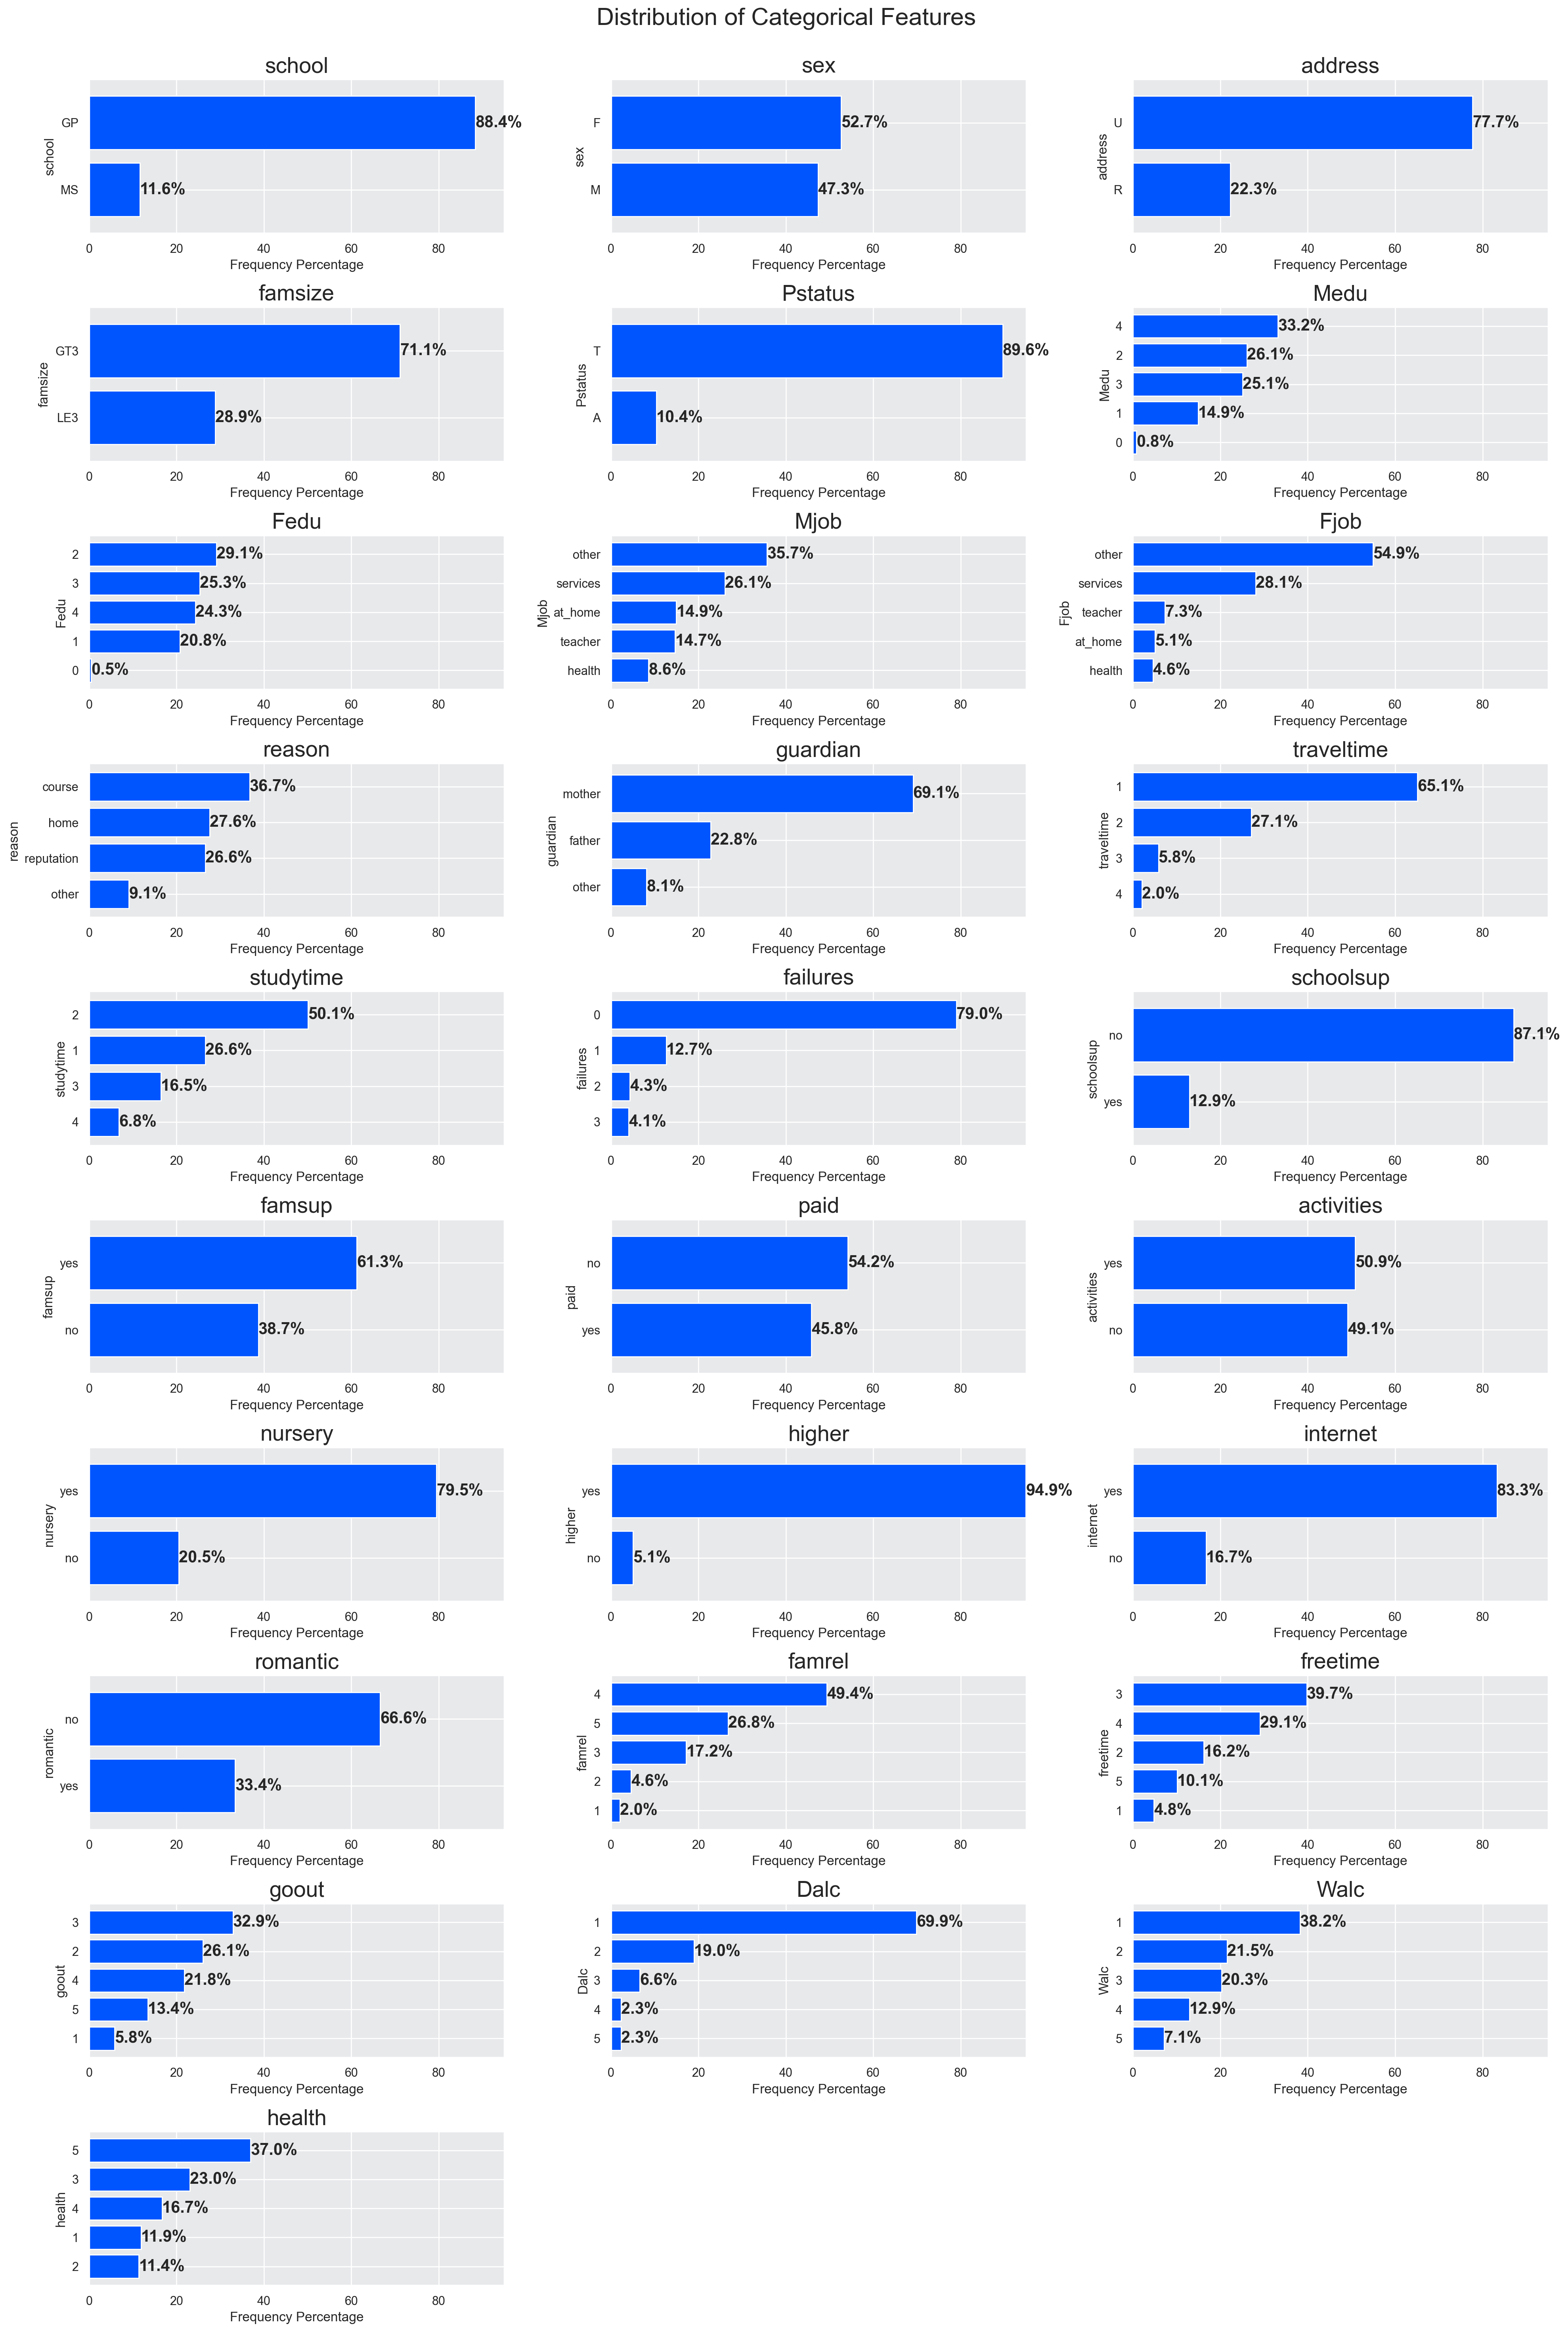

In [19]:
# Set up the subplot 
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 30))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_col):
    row = i // 3
    col_idx = i % 3
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='#0055ff')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[9,1].axis('off')    
ax[9,2].axis('off')
plt.suptitle('Distribution of Categorical Features', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h2>Inference</h2>:
    <ul style="list-style-type: square; color: #004085;">
        <li><b>School:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students belong to school GP (88.4%), while a smaller portion belong to school MS (11.6%).</li>
            </ul>
        </li>
        <li><b>Sex:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The distribution is fairly balanced with slightly more female students (52.7%) compared to male students (47.3%).</li>
            </ul>
        </li>
        <li><b>Address:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>A majority of students reside in urban areas (77.7%), while a smaller portion come from rural areas (22.3%).</li>
            </ul>
        </li>
        <li><b>Family Size(famsize):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students come from families with more than three members (GT3 - 71.1%), while the rest come from families with three or fewer members (LE3 - 28.9%).</li>
            </ul>
        </li>
        <li><b>Parental Cohabitation Status (Pstatus):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students live with both parents together (T - 89.6%), while a smaller percentage live apart (A - 10.4%).</li>
            </ul>
        </li>
        <li><b>Mother's Education (Medu):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The distribution of mother's education levels is fairly spread, with the highest percentage having education level 4 (33.2%) followed by level 2 (26.1%), level 3 (25.1%), level 1 (14.9%), and level 0 (0.8%).
.</li>
            </ul>
        </li>
        <li><b>Father's Education (Fedu):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The distribution of father's education levels shows that most fathers have education level 2 (29.1%), followed by level 3 (25.3%), level 4 (24.3%), level 1 (20.8%), and level 0 (0.5%).</li>
            </ul>
        </li>
        <li><b>Mother's Job (Mjob):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The majority of mothers are categorized as 'other' (35.7%), followed by those in services (26.1%), at home (14.9%), teachers (14.7%), and health (8.6%).</li>
            </ul>
        </li>
        <li><b>Father's Job (Fjob):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>A significant portion of fathers are categorized as 'other' (54.9%), followed by those in services (28.1%), teachers (7.3%), at home (5.1%), and health (4.6%).</li>
            </ul>
        </li>
        <li><b>Reason for Choosing School (reason):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students chose their school due to the course offering (36.7%), followed by proximity to home (27.6%), reputation (26.6%), and other reasons (9.1%).</li>
            </ul>
        </li>
        <li><b>Guardian:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The majority of students have their mother as their guardian (69.1%), followed by their father (22.8%), and others (8.1%).</li>
            </ul>
        </li>
        <li><b>Travel Time to School (traveltime):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students have a travel time of less than 15 minutes (level 1 - 65.1%), followed by 15 to 30 minutes (level 2 - 27.1%), 30 minutes to 1 hour (level 3 - 5.8%), and more than 1 hour (level 4 - 2.0%).</li>
            </ul>
        </li>
        <li><b>Studytime:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students spend 2 to 5 hours on study time (level 2 - 50.1%), followed by less than 2 hours (level 1 - 26.6%), 5 to 10 hours (level 3 - 16.5%), and more than 10 hours (level 4 - 6.8%).</li>
            </ul>
        </li>
                <li><b>Failures:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The majority of students have no past class failures (0 - 79.0%). Those with 1 failure make up 12.7%, 2 failures 4.3%, and 3 or more failures 4.1%.</li>
            </ul>
        </li>
        <li><b>School Support (schoolsup):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students do not receive extra educational support (no - 87.1%), while a smaller portion do (yes - 12.9%).</li>
            </ul>
        </li>
        <li><b>Family Support (famsup):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>A majority of students do not receive family educational support (no - 61.3%), while 38.7% do receive support (yes).</li>
            </ul>
        </li>
        <li><b>Paid Classes (paid):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>More than half of the students do not take extra paid classes (no - 54.2%), while 45.8% do (yes).</li>
            </ul>
        </li>
        <li><b>Extracurricular Activities (activities):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The distribution is quite balanced with slightly more students participating in extracurricular activities (yes - 50.9%) compared to those who do not (no - 49.1%).</li>
            </ul>
        </li>
        <li><b>Attended Nursery School (nursery):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students attended nursery school (yes - 79.5%), while a smaller portion did not (no - 20.5%).</li>
            </ul>
        </li>
        <li><b>Plans for Higher Education (higher):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>An overwhelming majority of students plan to pursue higher education (yes - 94.9%), with only a small portion not planning to do so (no - 5.1%).</li>
            </ul>
        </li>
        <li><b>Internet Access at Home (internet):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students have internet access at home (yes - 83.3%), while 16.7% do not (no).</li>
            </ul>
        </li>
        <li><b>In a Romantic Relationship (romantic):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>A majority of students are not in a romantic relationship (no - 66.6%), while 33.4% are (yes).</li>
            </ul>
        </li>
        <li><b>Family Relationship Quality (famrel):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students rate their family relationships as good (level 4 - 49.4%), followed by very good (level 5 - 26.8%), average (level 3 - 17.2%), poor (level 2 - 4.6%), and very poor (level 1 - 2.0%).</li>
            </ul>
        </li>
        <li><b>Free Time After School (freetime):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The distribution of free time after school is mostly moderate with level 3 (39.7%), followed by quite a lot (level 4 - 29.1%), a little (level 2 - 16.2%), very much (level 5 - 10.1%), and very little (level 1 - 4.8%).</li>
            </ul>
        </li>
        <li><b>Going Out with Friends (goout):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Students often go out with friends, with most rating it level 3 (32.9%), followed by level 4 (26.1%), level 2 (21.8%), level 5 (13.4%), and level 1 (5.8%).</li>
            </ul>
        </li>
        <li><b>Workday Alcohol Consumption (Dalc):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The majority of students have very low workday alcohol consumption (level 1 - 69.9%), followed by level 2 (19.0%), level 3 (6.6%), level 4 (2.3%), and level 5 (2.3%).</li>
            </ul>
        </li>
        <li><b>Weekend Alcohol Consumption (Walc):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Weekend alcohol consumption is more spread out, with the highest being level 2 (38.2%), followed by level 3 (21.5%), level 4 (20.3%), level 1 (12.9%), and level 5 (7.1%).</li>
            </ul>
        </li>
                <li><b>Current Health Status (health):</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Most students rate their health as good (level 5 - 37.0%), followed by very good (level 4 - 23.0%), average (level 3 - 16.7%), below average (level 2 - 11.9%), and poor (level 1 - 11.4%).</li>
            </ul>
        </li>
    </ul>  
    <h3 style="list-style-type: square; color: #004085;">Key Observations:</h3>
    <ul style="list-style-type: disc; color: #004085;">
        <li>There is a notable prevalence of certain categories within each feature, indicating a skew in some attributes (e.g., school, Pstatus, address, studytime, failures, higher education plans).</li>
        <li>The distributions provide insights into the lifestyle, academic support, and personal habits of the student population.</li>
        <li>Understanding these distributions can aid in identifying areas where students might need additional support or intervention, and help in designing more effective educational programs and policies.</li>
    </ul>

</div>







        
    


<a id="5"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">5 | Bivariate Analysis</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="5.1"></a>
# <b><span style='color:#333'>5.1 |</span><span style='color:#00008B'>  Target vs. Numerical Features</span></b>

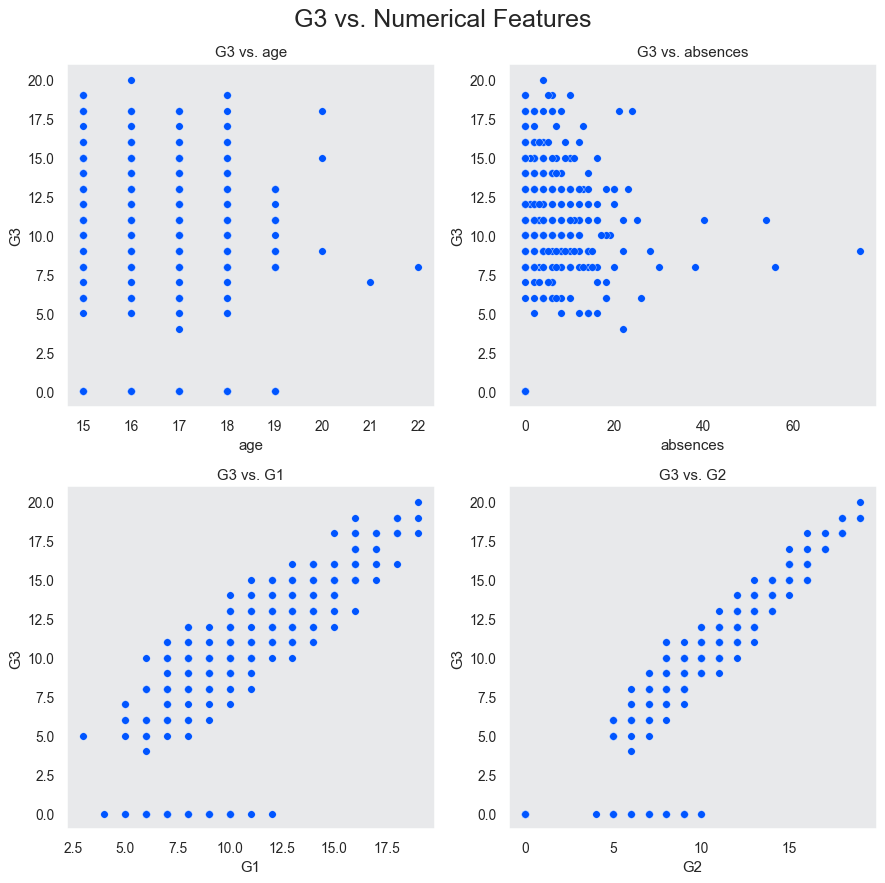

In [20]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['age', 'absences', 'G1', 'G2']
target = 'G3'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('G3 vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h2>Inference</h2>:
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Strong Predictors:</b> Both <b>G1</b> and <b>G2</b> are strong predictors of G3, with G2 being slightly stronger.</li>
        <li><b>Age:</b> Age does not show a significant correlation with final grades.</li>
        <li><b>Absences:</b> There is a weak negative correlation between absences and final grades, indicating that higher absences might contribute to lower grades but are not the sole determinant.</li>




<a id="5.2"></a>
# <b><span style='color:#333'>5.2 |</span><span style='color:#00008B'>  Target vs. Categorical Features</span></b>

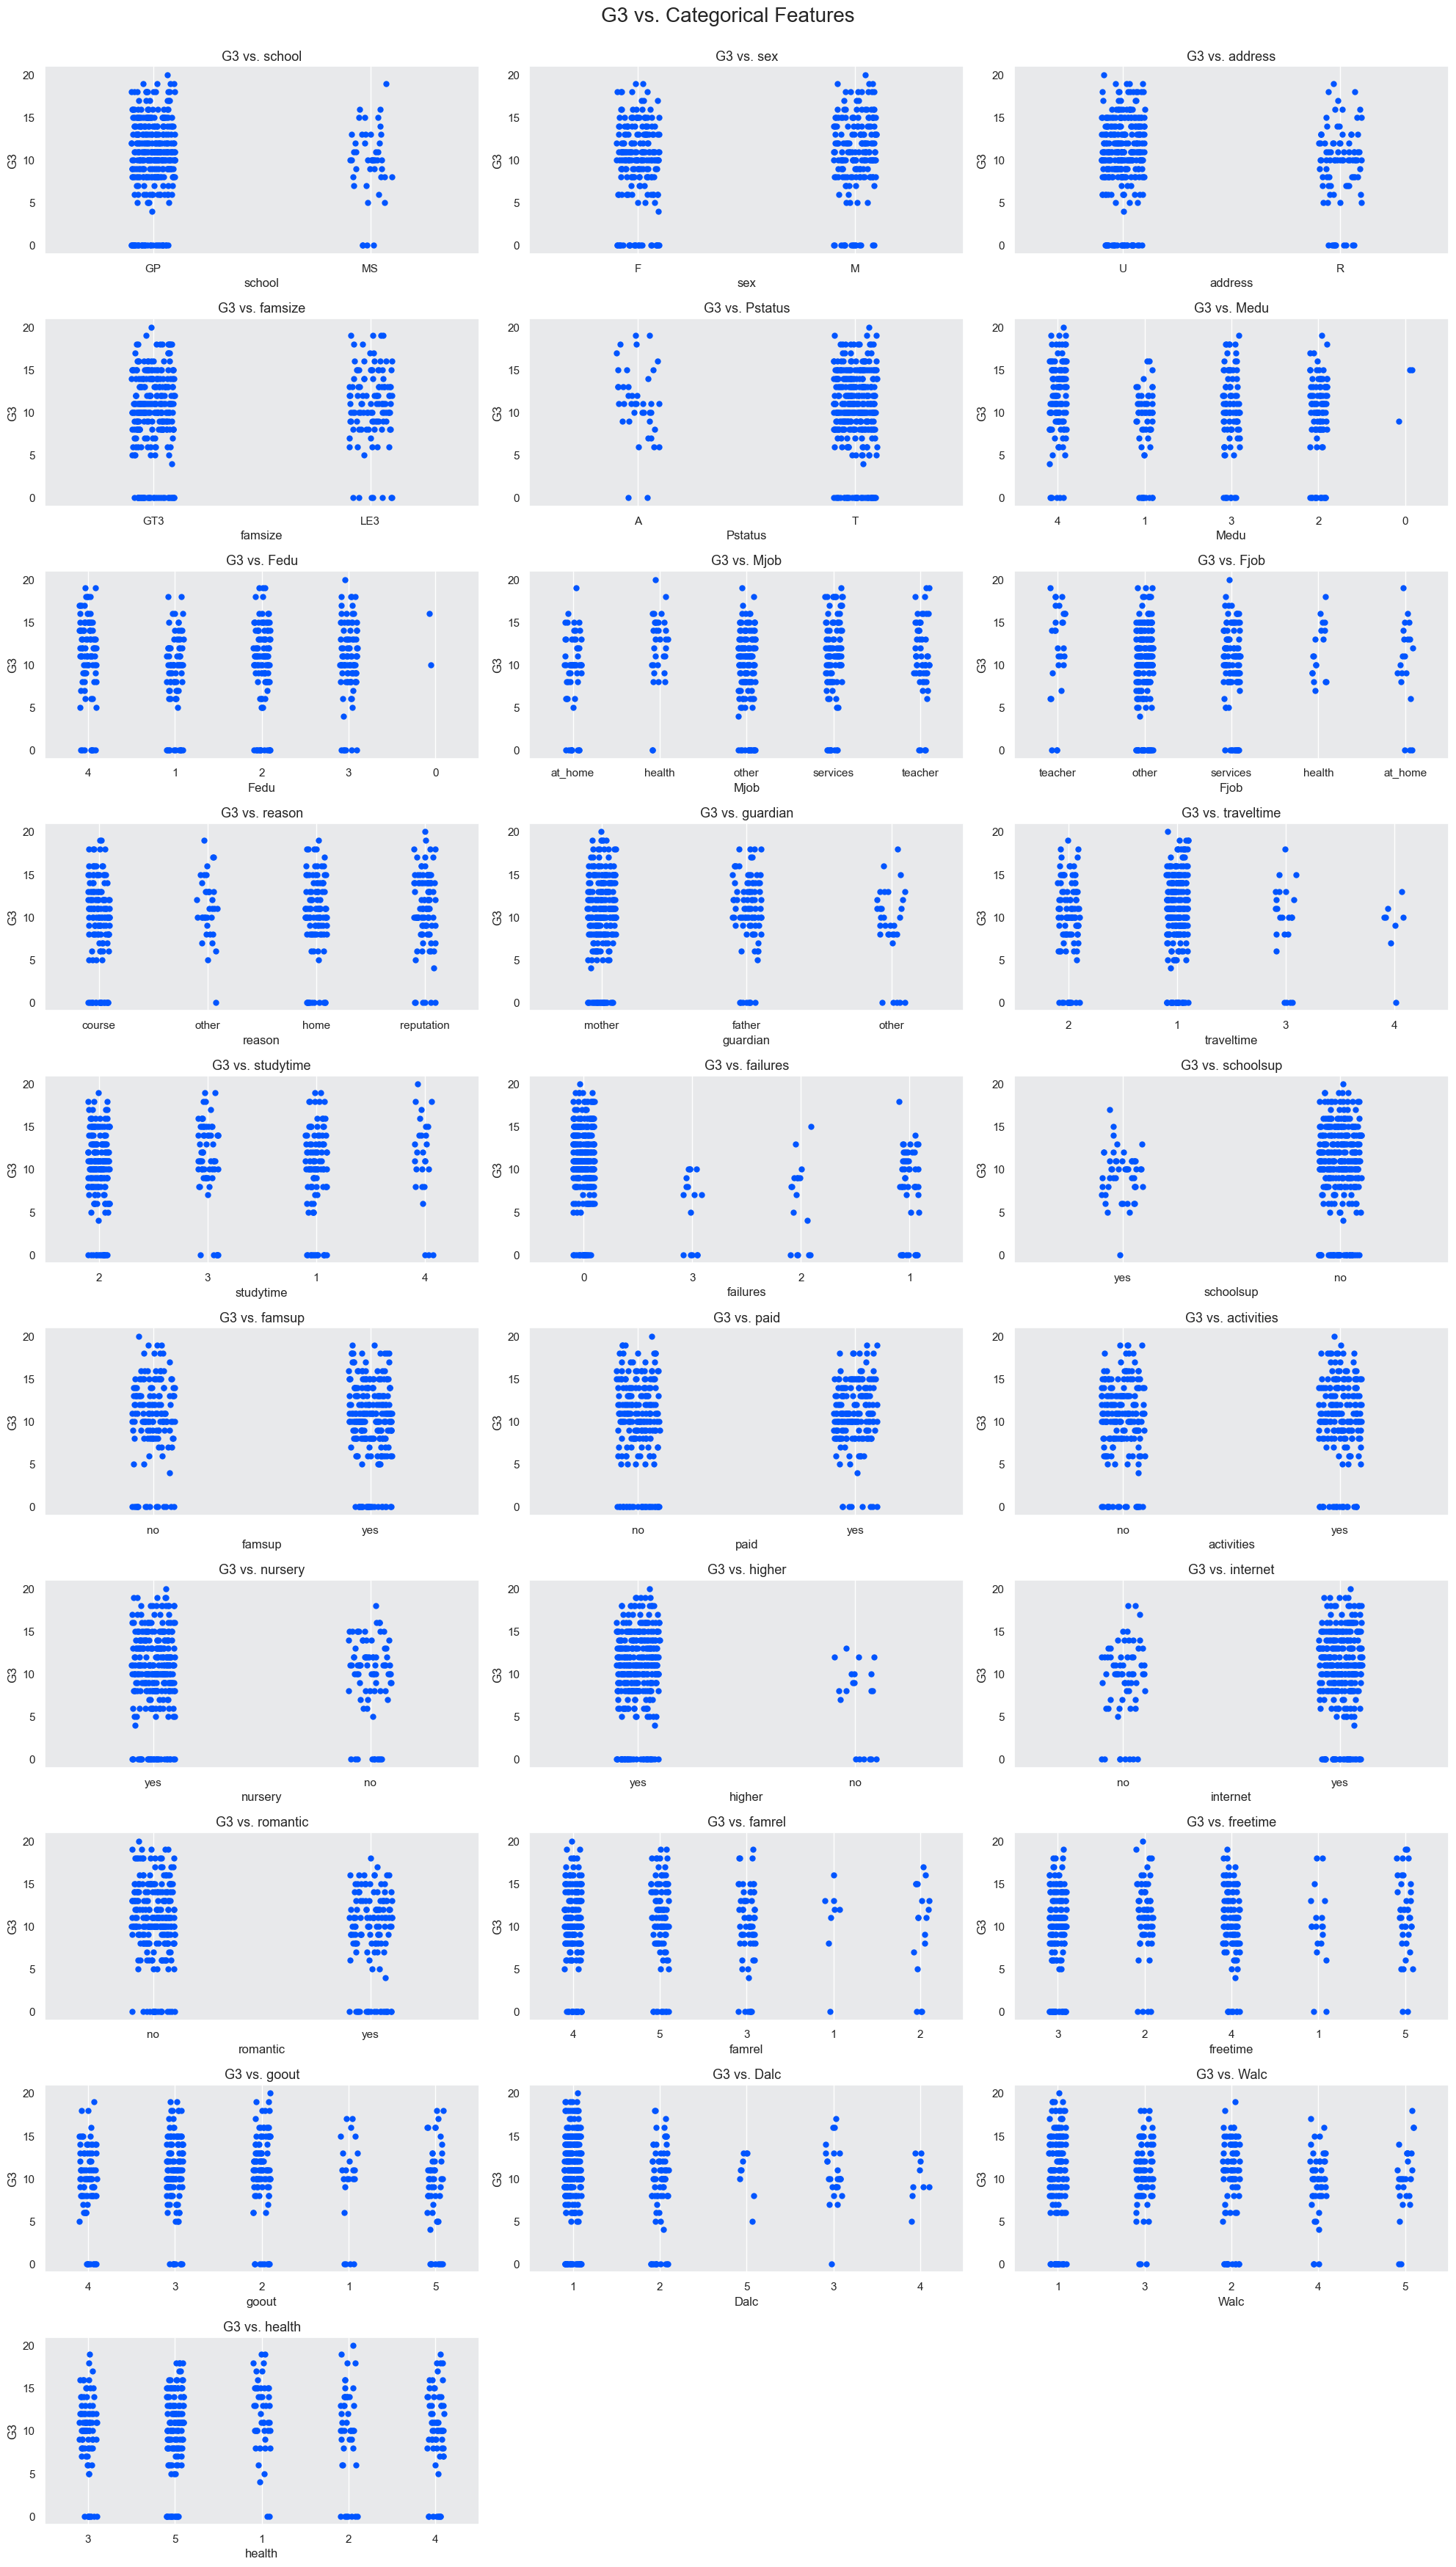

In [21]:
fig, axes = plt.subplots(nrows=10 ,ncols=3, figsize=(20,35), dpi=100)
target = 'G3'
c = '#0055ff'

for i in range(len(categorical_col)):
    row = i // 3
    col = i % 3
    sns.stripplot(ax=axes[row, col], x=categorical_col[i], y=target, data=df1, size=6, color=c)
    axes[row, col].set_title('{} vs. {}'.format(target, categorical_col[i]), size=13)
    axes[row, col].set_xlabel(categorical_col[i], size=12)
    axes[row, col].set_ylabel(target, size=12)
    axes[row, col].grid()

# Hide any unused subplots if the total number of subplots exceeds the number of categorical features
for j in range(len(categorical_col), 30):
    row = j // 3
    col = j % 3
    fig.delaxes(axes[row, col])

plt.suptitle('G3 vs. Categorical Features', size=20,y=0.999)
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h2>Inference:</h2>
    <p>factors such as <b>parental education, parental job, shorter travel time to school, more study time, fewer past failures, internet access, and aspirations for higher education </b> are positively correlated with <b>better student performance</b>.</p> <p>Conversely, <b>higher alcohol consumption and being in a romantic relationship</b> tend to be associated with <b>lower grades</b>.</p>

<a id="6"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">6 | Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="6.1"></a>
# <b><span style='color:#333'>6.1 |</span><span style='color:#00008B'> Handle Missing Values</span></b>

In [22]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <p>There are <b>no missing values</b> in the dataset</p>

<a id="6.2"></a>
# <b><span style='color:#333'>6.2 |</span><span style='color:#00008B'> Duplicate Data</span></b>

In [23]:
df.duplicated().sum()

0

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <p>There are <b>no duplicates</b> values in the dataset</p>

<a id="6.3"></a>
# <b><span style='color:#333'>6.3 |</span><span style='color:#00008B'> Outlier Treatment</span></b>

In [24]:
continuous_features

['age', 'absences', 'G1', 'G2', 'G3']

In [25]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age          1
absences    15
G1           0
G2          13
G3           0
dtype: int64

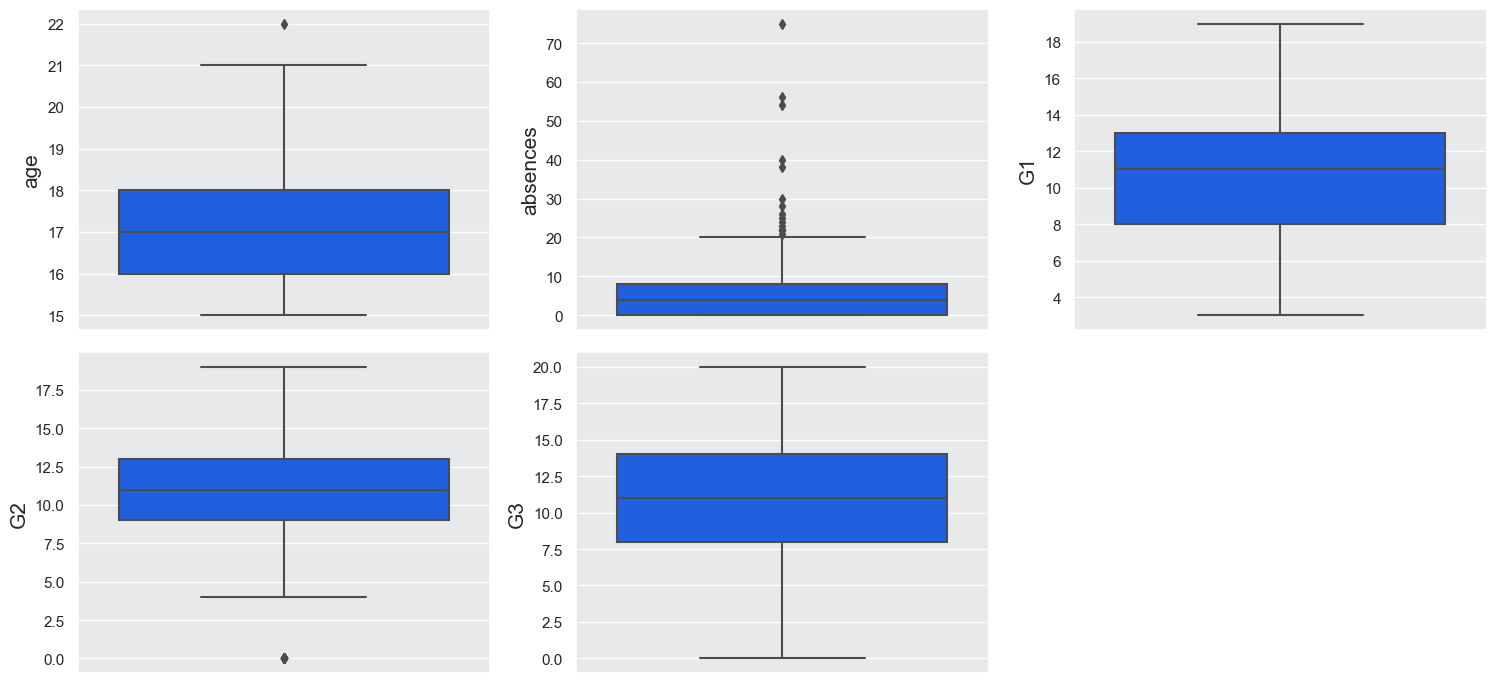

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(15,7),dpi=100)

for i,col in enumerate(continuous_features):
    x = i//3
    y = i%3
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y], color=c)
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='G3', ax=ax[x,y], color=c)
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)
        
ax[1,2].axis('off')  
plt.tight_layout()    
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <h2>Outliers Identification:</h2>
    <p>Upon identifying outliers for the specified continuous features, we found the following counts of outliers:</p>
    <ul>
        <li><b>age:</b> 1 outliers</li>
        <li><b>absences:</b> 15 outliers</li>
        <li><b>G1:</b> 0 outliers</li>
        <li><b>G2:</b> 13 outliers</li>
        <li><b>G3:</b> 0 outliers</li>
    </ul>
</div>

<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>📝 Sensitivity to Outliers:</h3>
    <br>
    For model evaluations, we are going to use the <b>Linear Regression Model</b>:
    <p>Linear Regression is sensitive to outliers. Direct removal of outliers is not acceptable because they can be legitimate observations. Simply dropping these observations can lead to biased models and missed insights.</p>
    <p>To overcome this, we'll focus on applying transformations like <b>Box-Cox</b> in the subsequent steps. These transformations will help reduce the impact of outliers and make the data more suitable for modeling.</p>
</div>


<a id="6.4"></a>
# <b><span style='color:#333'>6.4 |</span><span style='color:#00008B'> Encode Categorical Variables</span></b>

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <p>As seen in the Dataset Description, some features are already encoded. We will encode the remaining ones.</p>
    <p>The remaining features that need to be encoded are all <b>nominal</b> features. We will use <b>One-Hot Encoding</b> for them.</p>

In [27]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [28]:
one_hot_cols = list(df.describe(include="object").columns)

In [29]:
df_enc = pd.get_dummies(df, columns=one_hot_cols,dtype=int, drop_first=True)

In [30]:
df_enc.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
school_MS            int32
sex_M                int32
address_U            int32
famsize_LE3          int32
Pstatus_T            int32
Mjob_health          int32
Mjob_other           int32
Mjob_services        int32
Mjob_teacher         int32
Fjob_health          int32
Fjob_other           int32
Fjob_services        int32
Fjob_teacher         int32
reason_home          int32
reason_other         int32
reason_reputation    int32
guardian_mother      int32
guardian_other       int32
schoolsup_yes        int32
famsup_yes           int32
paid_yes             int32
a

In [31]:
len(df_enc.columns)

42

<a id="7"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">7 | Correlation Analysis</p>

⬆️ [Tabel of Contents](#contents_tabel)

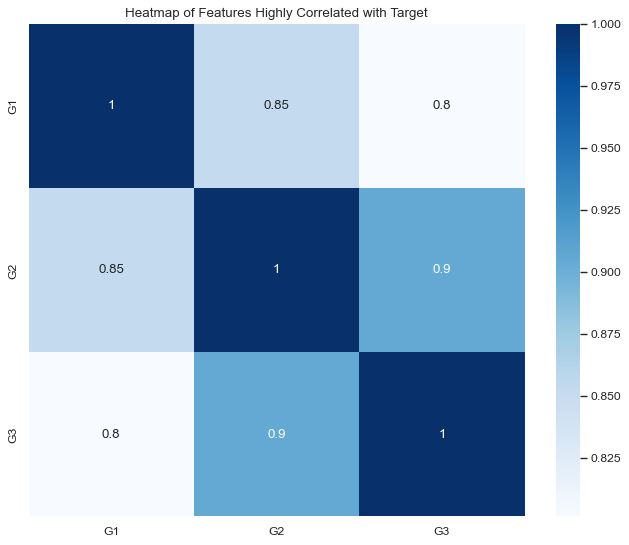

In [32]:
# Calculate correlation matrix
corr_matrix = df_enc.corr()

# Set correlation threshold
threshold = 0.5

# Get features highly correlated (positive or negative) with the target
high_corr_features = corr_matrix.index[abs(corr_matrix[target]) > threshold].tolist()

# Ensure the target itself is included
if target not in high_corr_features:
    high_corr_features.append(target)

# Plot heatmap for highly correlated features
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
sns.heatmap(df_enc[high_corr_features].corr(), annot=True, cmap='Blues', ax=ax)
plt.title('Heatmap of Features Highly Correlated with Target')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <p>We can observe a high correlation between the features G1 and G2, indicating the presence of multicollinearity. To address this issue, we propose creating a new feature called <b>avg_G</b>. This new feature will represent the average of G1 and G2, providing a solution to mitigate the effects of multicollinearity.</p>
</div>


In [33]:
# Creating new feature 'avg_G' as the average of G1 and G2
df_enc['avg_G'] = (df_enc['G1'] + df_enc['G2']) / 2

# Drop the original 'G1' and 'G2' features
df_enc.drop(['G1', 'G2'], axis=1, inplace=True)

<a id="8"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">8 | Build Linear Regression Model</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="8.1"></a>
# <b><span style='color:#333'>8.1 |</span><span style='color:#00008B'> Determine Features & Target Variables</span></b>

In [34]:
X = df_enc.drop('G3', axis=1)
y = df_enc['G3']

<a id="8.2"></a>
# <b><span style='color:#333'>8.2 |</span><span style='color:#00008B'> Split Dataset to Training & Test Sets</span></b>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (316, 40)
X_test shape:  (79, 40)
y_train shape:  (316,)
y_test shape:  (79,)


In [37]:
y_test_actual = y_test

<a id="8.3"></a>
# <b><span style='color:#333'>8.3 |</span><span style='color:#00008B'> Scale Data using Standard Scaler</span></b>

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    It is very important that StandardScaler transformation should only be learnt from the training set, otherwise it will lead to data leakage.

<a id="8.4"></a>
# <b><span style='color:#333'>8.4 |</span><span style='color:#00008B'>  Train the Model</span></b>

In [39]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [40]:
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_), 
             index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,10.474684
avg_G Coef.,3.929362
absences Coef.,0.462009
schoolsup_yes Coef.,0.376977
Medu Coef.,0.351168
Fjob_services Coef.,0.268941
Walc Coef.,0.265778
school_MS Coef.,0.222603
reason_other Coef.,0.192467
paid_yes Coef.,0.181349


<a id="8.5"></a>
# <b><span style='color:#333'>8.5 |</span><span style='color:#00008B'> Model Evaluation</span></b>

In [41]:
def model_evaluation(model, X, y, model_name):
    y_pred = model.predict(X)
    
    MAE = metrics.mean_absolute_error(y, y_pred)
    MSE = metrics.mean_squared_error(y, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [42]:
model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.Test')

,Linear Reg.Test
MAE,1.756912
MSE,6.097376
RMSE,2.469287
R2-Score,0.778991


In [43]:
model_evaluation(linear_reg, X_train_scaled, y_train, 'Linear Reg.Train')

,Linear Reg.Train
MAE,1.290855
MSE,3.253707
RMSE,1.803803
R2-Score,0.831026


<a id="8.6"></a>
# <b><span style='color:#333'>8.6 |</span><span style='color:#00008B'>  Model Evaluation using Cross-Validation</span></b>

In [44]:
linear_reg_cv = LinearRegression()
scaler = StandardScaler()
pipeline = make_pipeline(StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0) 
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)


MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,1.563285,0.135170
MSE,4.756281,0.935012
RMSE,2.171421,0.203001
R2-Score,0.761471,0.041799


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <ul>
        <li>The linear regression model obtained R2-score of <b>76.14%</b> using 6-fold cross-validation.</li>

<li>Pipeline is a great way to prevent data leakage as it ensures that the appropriate method is performed on the correct data subset. This is ideal for using in cross-validation since it ensures that only the training folds are used when performing fit and the test set (validation set) is used only for calculating the accuracy score in each iteration of cross-validation.</li>

<a id="8.7"></a>
# <b><span style='color:#333'>8.7 |</span><span style='color:#00008B'> Assumptions</span></b>

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;margin-bottom:12px">
    We need to check the assumptions of linear regression, because if the assumptions are not met, the interpretation of the results will not always be valid:    
    </div>
      <h2>Assumption 1 - Linearity</h2>  
      <br>
<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

This assumes that there is a linear relationship between the independent variables or features and the dependent variable or label. Fitting a linear model to data with non-linear patterns results in serious prediction errors, because our model is underfitting.

To detect nonlinearity, we can check:
    <ul>
<li>Plots of actual vs. predicted values -> The desired outcome is that points are symmetrically distributed around a diagonal line</li>
<li>Plots of residuals vs. predicted values -> The desired outcome is that points are symmetrically distributed around a horizontal line</li>
        
In both cases we should have an almost constant variance.

In [45]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [46]:
def linear_assumption(model, X_test, y_test):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    '''
    df_results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)        
    
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)  

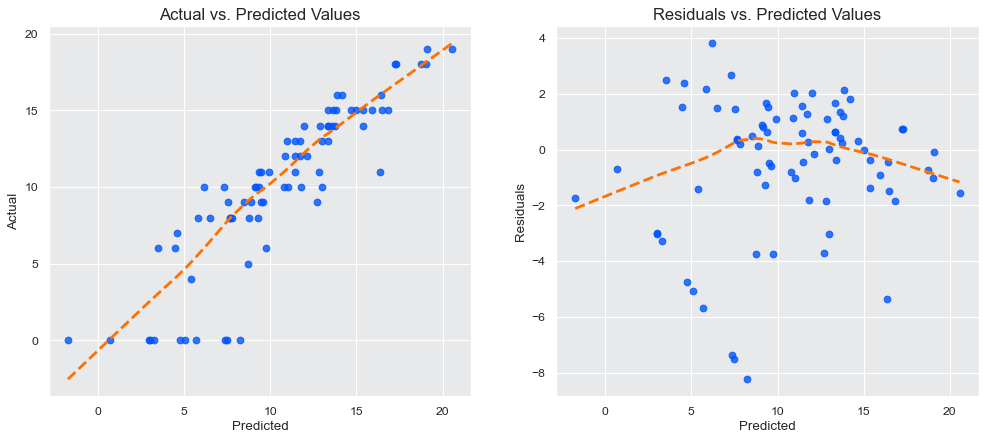

In [47]:
linear_assumption(linear_reg, X_test_scaled, y_test)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;margin-bottom:12px">
    The inspection of the plots shows that the linearity assumption is not satisfied.
        <h4>Potential solutions:</h4>
<ul>
    <li>Applying nonlinear transformations</li>
    <li>Adding polynomial terms to some of the predictors</li>

<h2>Assumption 2 - Normality of Residuals</h2>
<br>
<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;margin-bottom:12px">
<p>This assumes that the model's error terms (residuals) follow a normal distribution with a mean of zero.</p>
<p>However, this assumption can be violated if:</p>
<ul>
    <li>The predictors or the label are significantly non-normal.</li>
    <li>The linearity assumption is not met.</li>
    <li>There are a few large outliers in the data.</li>
    </ul>
    
<p>If this assumption is violated, it can affect the confidence intervals of the model, making them either too wide or too narrow. This means we might not be able to trust the precision of our interval estimates.</p>

<p>While we can sometimes skip this assumption if we're only interested in estimating coefficients and making predictions (to minimize mean squared error), it's usually important when we want to make valid inferences or estimate the probability of prediction errors exceeding a certain threshold. For these purposes, normality of residuals is crucial.</p>

To check this assumption, we can:
<ul>
    <li>Examine a histogram of the residuals.</li>
    <li>Use a Quantile-Quantile (Q-Q) plot to compare the residuals against a normal distribution.</li>
    <li>Perform an Anderson-Darling test to statistically assess normality.</li>

In [48]:
def normal_errors_assumption(model, X_test, y_test, p_value_thresh=0.05):
    '''
    Function for inspecting the assumption of normality of residuals.
    '''
    df_results = residuals(model, X_test, y_test)
    
    # Anderson-Darling Test
    p_value = normal_ad(df_results['Residuals'])[1]
    
    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.') 
    else:
        print('Residuals are normally distributed. Assumption satisfied.')

      
    # Residuals Histogram
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    
    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15, 
                 color='#0055ff', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))
    
    
    # Q-Q Probability Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#509aff')
    ax[1].get_lines()[1].set_color('#ff7000')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])
    
    plt.show()


P-value from the test (below 0.05 generally means non-normal):   7e-06
Residuals are not normally distributed. Assumption not satisfied.


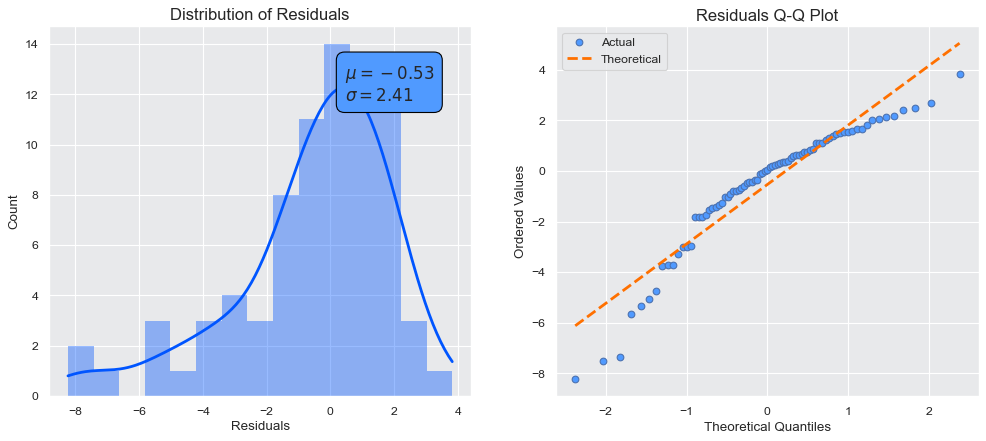

In [49]:
normal_errors_assumption(linear_reg, X_test_scaled, y_test)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;margin-bottom:12px">
    <p>In QQ Plot of residuals:</p>
<ul>
<li>The bow-shaped pattern of deviations from the diagonal implies that the residuals have excessive skewness.</li>
<li>The s-shaped pattern of deviations from the diagonal implies excessive kurtosis of the residuals (there are either too many or too few large errors in both directions.)</li>
    
<p>The non-zero mean value and the positive skewness of the residual distribution and the s-shaped pattern of the deviations in the QQ plot show that the residuals do not follow the Gaussian distribution.</p>
    <h4>Potential solutions:</h4>
    <li>Nonlinear transformation of target variable and features</li>
    <li>Removing potential outliers</li>

<h2>Assumption 3 - No Perfect Multicollinearity</h2>
<br>
<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
<p>Multicollinearity occurs when independent variables are correlated, making it difficult for the model to estimate their relationships with the dependent variable independently. This leads to imprecise estimates, increased standard errors, and potential overfitting.</p>
<p>To detect multicollinearity, we can:</p>
<ul>
     <li>Use a heatmap of the correlation.</li>
     <li>Examine the variance inflation factor (VIF).</li>
</ul>     
<p><b>Interpretation of VIF:</b> A higher VIF indicates higher correlation with other variables. If VIF > 10, multicollinearity is considered high.</p>
</div>

In [50]:
def highlight_multicollinearity(s):
    '''
    Highlight the background color of cells with VIF > 10 in yellow.
    '''
    return ['background-color: yellow' if v > 10 else '' for v in s]

def multicollinearity_assumption(X):
    '''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors.
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])
    
    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')
    
    vif_df = pd.DataFrame({'vif': vif}, index=X.columns).round(2)
    
    # Use Styler to apply conditional formatting
    return vif_df.style.apply(highlight_multicollinearity, subset=['vif'])

In [51]:
multicollinearity_assumption(X)

10 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,vif
age,95.720000
Medu,21.370000
Fedu,13.460000
traveltime,6.590000
studytime,9.570000
failures,1.850000
famrel,23.080000
freetime,14.710000
goout,13.110000
Dalc,7.640000


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    <p>There is possible multicollinearity for 10 features as highlighted.</p>
    <p><b>Potential solutions:</b></p>
<ul>
    <li>Using Regularization</li>
    <li>Removing features with high values of VIF</li>
    <li>Using PCA -> Reducing features to a smaller set of uncorrelated components</li>

<h2>Assumption 4 - No Autocorrelation of Residuals</h2>
<br>
<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
  <p>This assumes no autocorrelation of the residuals. The presence of autocorrelation usually indicates that we are missing some information that should be captured by the model. Our model can be systematically biased by under-prediction or over-prediction under certain conditions. This could be the result of violating the linearity assumption.</p>

<p>To investigate this assumption we can perform a Durbin-Watson test to determine whether the correlation is positive or negative:</p>
<ul>
    <li>The test statistic always has a value between 0 and 4</li>
    <li>Values of 1.5 < d < 2.5 means that there is no autocorrelation in the data</li>
     <li>Values < 1.5 indicate positive autocorrelation, values > 2.5 indicate negative autocorrelation</li>
    </ul>

In [52]:
def autocorrelation_assumption(model, X_test, y_test):
    '''
    It assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then 
    there is a pattern that is not explained because the current value is dependent on the previous value.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))
    
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

In [53]:
autocorrelation_assumption(linear_reg, X_test_scaled, y_test)

Durbin-Watson: 1.806
Little to no autocorrelation. Assumption satisfied. 



<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    <p>Durbin-Watson test indicates there is no autocorrelation.</p>
    <p>Potential solution for fixing autocorrelation of residuals:</p>
    <b>Adding interaction terms</b>

<h2>Assumption 5 - Homoscedasticity</h2>
<br>
<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    <p><b>Homoscedasticity</b> means that the residuals (the differences between observed and predicted values) have the same spread or variability across all levels of the target variable.</p>
<ul>
    <li><b>Why It Matters:</b> If the residuals don't have constant variance (heteroscedasticity), it makes it hard to know the true accuracy of the predictions. This can lead to wrong estimates of the prediction errors and unreliable confidence intervals.</li>
    <li><b>Effect:</b> Heteroscedasticity can cause the model to give too much importance to certain parts of the data, affecting the estimates of the coefficients.</li>
    <li><b>Checking for Homoscedasticity:</b> You can check for homoscedasticity by plotting the residuals against the predicted values. The points should be scattered randomly without any clear pattern (no systematic increase or decrease).</li>

In [54]:
def homoscedasticity_assumption(model, X_test, y_test):
    """
    Homoscedasticity assumes that the residuals exhibit constant variance
    """
    print('The orange line should be flat:')
    df_results = residuals(model, X_test, y_test)
    
    fig = plt.figure(figsize=(6,6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    plt.axhline(y=0, color='#23bf00', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)    
    plt.show()

The orange line should be flat:


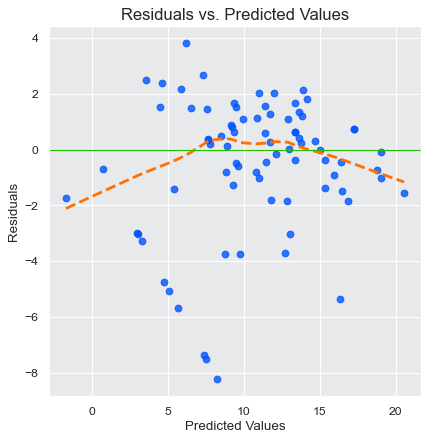

In [55]:
homoscedasticity_assumption(linear_reg, X_test_scaled, y_test)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    <p>We can not see a fully uniform variance across our residuals because the orange line is not flat. The assumption is not satisfied.</p>
    <p>Potential solutions:</p>
<ul>
    <li>Outlier removal</li>
    <li>Appllying log transformation of independent variables</li>
    <li>Applying polynomial regression</li>
    </ul>

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    <p>In the following:</p>
    <ul>
        <li>To satisfy the multicollinearity assumption, we remove the <b>age</b>(since VIF is ~95) feature, and for others we will using regularisation techniques.</li>
<li>Then, according to the pattern in the plot of the residuals vs. predicted values, we will use <b>box-cox transformation</b> on the entire dataset.</li>
        <li>By applying <b>polynomial regression</b>, we will try to improve the satisfaction of homoscedasticity and normality of residuals.</li>
        <li>Finally, we will use regularization to reduce the probability of the model to be overfit.</li>
    </ul>

In [56]:
df_enc.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes', 'avg_G'],
      dtype='object')

In [57]:
columns_to_delete = ['age']
df_enc.drop(columns=columns_to_delete, axis=1, inplace=True)

<a id="8.8"></a>
# <b><span style='color:#333'>8.8 |</span><span style='color:#00008B'> Results Visualization</span></b>
<br>
<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
We compare the actual and predicted target values for the test data with the help of a bar plot:

In [58]:
y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

In [59]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Final grade', fontsize=15)
    plt.show()

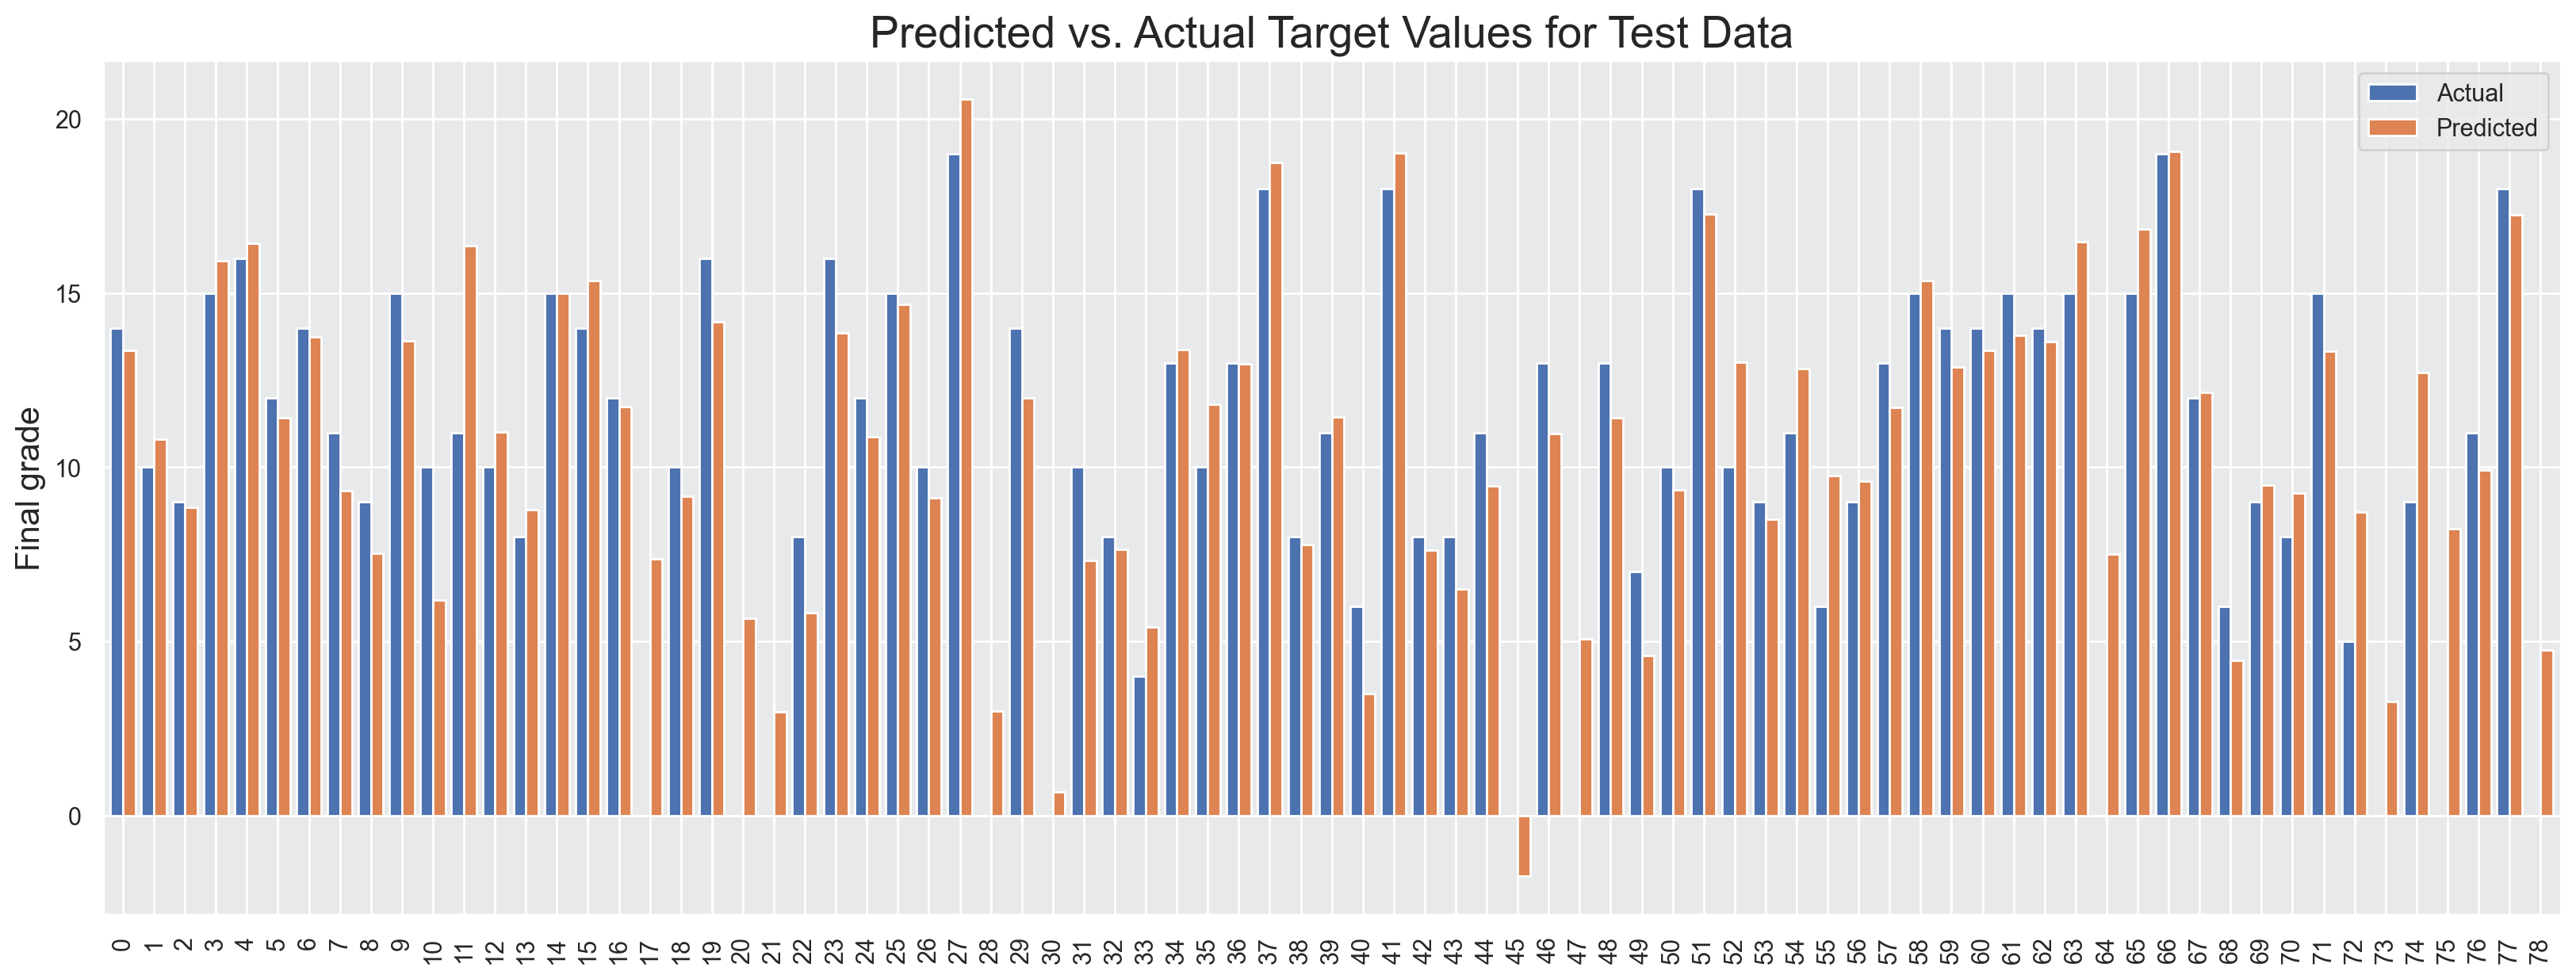

In [60]:
compare_plot(df_comp)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    The difference between the corresponding bars in the above bar plot shows the prediction error of the model on the test data. Also, out of 79 test samples,Final Grade has been predicted negatively in 1 case. A negative prediction for Final Grade is disappointing.

<a id="9"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">9 | Apply Box-Cox Transformation</p>

⬆️ [Tabel of Contents](#contents_tabel)

<br>
<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
<p>In order to satisfy the regression assumptions, we apply the Box-Cox transformation on the whole dataset. The Box-Cox transformations change the shape of our data, making it more close to a normal distribution.</p>

<p>In order to prevent data leakage, the fitted lambda value for each feature is obtained from the training data set and then the transformation is applied to the both training and test data: </p>   

<a id="9.1"></a>
# <b><span style='color:#333'>9.1 |</span><span style='color:#00008B'>Transform Training Data & Save Lambda Values</span></b>

In [61]:
df_enc

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_MS,sex_M,address_U,famsize_LE3,...,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,avg_G
0,4,4,2,2,0,4,3,4,1,1,3,6,6,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,5.5
1,1,1,1,2,0,5,3,3,1,1,3,4,6,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,5.0
2,1,1,1,2,3,4,3,2,2,3,3,10,10,0,0,1,1,...,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,7.5
3,4,2,1,3,0,3,2,2,1,1,5,2,15,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,14.5
4,3,3,1,2,0,4,3,2,1,2,5,4,10,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,1,2,2,5,5,4,4,5,4,11,9,1,1,1,1,...,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0,9.0
391,3,1,2,1,0,2,4,5,3,4,2,3,16,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,15.0
392,1,1,1,1,3,5,5,3,3,3,3,3,7,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,9.0
393,3,2,3,1,0,4,4,1,3,4,5,0,10,1,1,0,1,...,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,11.5


In [62]:
# fitted_lambda = pd.Series(np.zeros(len(df_enc.columns), dtype=np.float64), index=df_enc.columns)

# y_train, fitted_lambda['G3'] = stats.boxcox(y_train+1)
# for col in X_train.columns:
#     X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col]+1)
    
# fitted_lambda

<a id="9.2"></a>
# <b><span style='color:#333'>9.2 |</span><span style='color:#00008B'>Transform Test Data Using Lambda Values</span></b>

In [63]:
# Specify the columns you want to transform
columns = ['avg_G', 'absences']

# Initialize the Series with the specified columns only
fitted_lambda = pd.Series(np.zeros(len(columns), dtype=np.float64), index=columns)

# Transform y_train and store the lambda value for 'G3'
y_train, fitted_lambda['G3'] = stats.boxcox(y_train + 1)

# Transform the specified columns in X_train and store their lambda values
for col in columns:
    X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col] + 1)

# Display the fitted lambda values
fitted_lambda

avg_G       0.870297
absences    0.000430
G3          1.310821
dtype: float64

In [64]:
y_test = stats.boxcox(y_test+1, fitted_lambda['G3'])
for col in columns:
    X_test[col] = stats.boxcox(X_test[col]+1, fitted_lambda[col])

In [65]:
y_train = pd.DataFrame(y_train, index=X_train.index, columns=['G3'])
y_test = pd.DataFrame(y_test, index=X_test.index, columns=['G3'])

X_boxcox = pd.concat([X_train, X_test])
y_boxcox = pd.concat([y_train, y_test])

df_boxcox = pd.concat([X_boxcox, y_boxcox], axis=1)
df_boxcox.sort_index(inplace=True)

df_boxcox.drop(columns=columns_to_delete, axis=1, inplace=True)

In [66]:
df_boxcox

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,...,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,avg_G,G3
0,4,4,2,2,0,4,3,4,1,1,3,1.946725,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,4.709764,9.014639
1,1,1,1,2,0,5,3,3,1,1,3,1.609995,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,4.315526,9.014639
2,1,1,1,2,3,4,3,2,2,3,3,2.399133,0,0,1,1,1,...,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,6.250476,16.919298
3,4,2,1,3,0,3,2,2,1,1,5,1.098872,0,0,1,0,1,...,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,11.332687,28.133409
4,3,3,1,2,0,4,3,2,1,2,5,1.609995,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,6.627872,16.919298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,1,2,2,5,5,4,4,5,4,2.486236,1,1,1,1,0,...,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0,7.374691,14.842608
391,3,1,2,1,0,2,4,5,3,4,2,1.386708,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,11.682376,30.523448
392,1,1,1,1,3,5,5,3,3,3,3,1.386708,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,7.374691,10.884968
393,3,2,3,1,0,4,4,1,3,4,5,0.000000,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,9.201670,16.919298


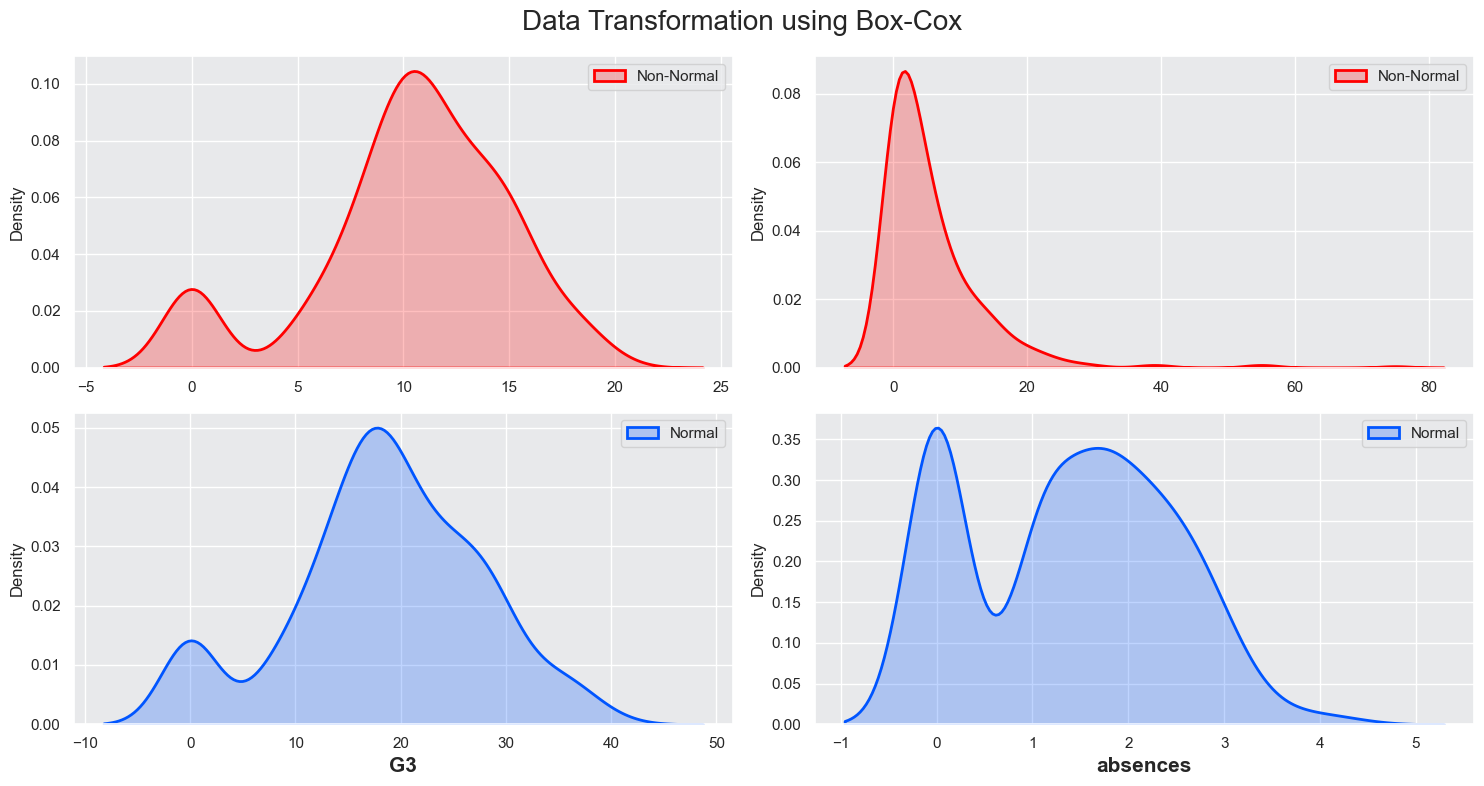

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(15,8), dpi=100)
columns = ['G3', 'absences']

for i,col in enumerate(columns):
    sns.kdeplot(df_enc[col], label="Non-Normal", fill=True, color='red', linewidth=2, ax=ax[0,i])
    sns.kdeplot(df_boxcox[col], label="Normal", fill=True, color='#0055ff', linewidth=2, ax=ax[1,i])  
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

# ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">As can be seen, the distribution of the variables is closer to the normal distribution after applying Box-Cox.

In [68]:
X = df_boxcox.drop('G3', axis=1)
y = df_boxcox['G3']

<a id="10"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">10 | Build 2nd-order Polynomial Regression</p>

⬆️ [Tabel of Contents](#contents_tabel)

<br>
<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    <p>In order to overcome under-fitting and meet linear regression assumptions, first we try to increase the complexity of the model by adding all of the second-order terms of the features:</p>

<a id="10.1"></a>
# <b><span style='color:#333'>10.1 |</span><span style='color:#00008B'> Create 2nd-order Polynomial Features</span></b>

In [69]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head(5)

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,...,activities_yes romantic_yes,activities_yes avg_G,nursery_yes^2,nursery_yes higher_yes,nursery_yes internet_yes,nursery_yes romantic_yes,nursery_yes avg_G,higher_yes^2,higher_yes internet_yes,higher_yes romantic_yes,higher_yes avg_G,internet_yes^2,internet_yes romantic_yes,internet_yes avg_G,romantic_yes^2,romantic_yes avg_G,avg_G^2
0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,1.946725,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,1.0,1.0,0.0,0.0,4.709764,1.0,0.0,0.0,4.709764,0.0,0.0,0.000000,0.0,0.000000,22.181879
1,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,1.609995,0.0,0.0,1.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,4.315526,1.0,0.0,4.315526,0.0,0.000000,18.623765
2,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0,2.399133,0.0,0.0,1.0,1.0,1.0,...,0.0,0.000000,1.0,1.0,1.0,0.0,6.250476,1.0,1.0,0.0,6.250476,1.0,0.0,6.250476,0.0,0.000000,39.068449
3,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,1.098872,0.0,0.0,1.0,0.0,1.0,...,1.0,11.332687,1.0,1.0,1.0,1.0,11.332687,1.0,1.0,1.0,11.332687,1.0,1.0,11.332687,1.0,11.332687,128.429800
4,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,1.609995,0.0,0.0,1.0,0.0,1.0,...,0.0,0.000000,1.0,1.0,0.0,0.0,6.627872,1.0,0.0,0.0,6.627872,0.0,0.0,0.000000,0.0,0.000000,43.928684


In [70]:
poly_features_names = poly_features.get_feature_names_out(X.columns)
len(poly_features_names)

819

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    With the construction of second-order features, the number of dataframe features increased to 495

<a id="10.2"></a>
# <b><span style='color:#333'>10.2 |</span><span style='color:#00008B'> Split Dataset to Training & Test Sets</span></b>

In [71]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [72]:
print('X_poly_train shape: ', X_poly_train.shape)
print('X_poly_test shape: ', X_poly_test.shape)
print('y_poly_train shape: ', y_poly_train.shape)
print('y_poly_test shape: ',y_poly_test.shape)

X_poly_train shape:  (276, 819)
X_poly_test shape:  (119, 819)
y_poly_train shape:  (276,)
y_poly_test shape:  (119,)


<a id="10.3"></a>
# <b><span style='color:#333'>10.3 |</span><span style='color:#00008B'> Scale Data using Standard Scaler</span></b>

In [73]:
scaler = StandardScaler()
scaler.fit(X_poly_train)

X_poly_train = scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

<a id="10.4"></a>
# <b><span style='color:#333'>10.4 |</span><span style='color:#00008B'> Create Polynomial Regression Model using Linear Regression</span></b>

In [74]:
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

<a id="10.5"></a>
# <b><span style='color:#333'>10.5 |</span><span style='color:#00008B'> Model Evaluation</span></b>

In [75]:
model_evaluation(polynomial_reg, X_poly_test, y_poly_test, 'Polynomial Reg. Test')

,Polynomial Reg. Test
MAE,4.139384
MSE,29.735373
RMSE,5.453015
R2-Score,0.719059


In [76]:
model_evaluation(polynomial_reg, X_poly_train, y_poly_train, 'Polynomial Reg. Train')

,Polynomial Reg. Train
MAE,1.628971e-14
MSE,4.351425e-28
RMSE,2.086007e-14
R2-Score,1.000000e+00


<a id="10.6"></a>
# <b><span style='color:#333'>10.6 |</span><span style='color:#00008B'> Model Evaluation using Cross-Validation</span></b>

In [77]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0) 
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result2 = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)
MAE_mean = (-result2['test_neg_mean_absolute_error']).mean()
MAE_std = (-result2['test_neg_mean_absolute_error']).std()
MSE_mean = (-result2['test_neg_mean_squared_error']).mean()
MSE_std = (-result2['test_neg_mean_squared_error']).std()
RMSE_mean = (-result2['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result2['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result2['test_r2'].mean()
R2_Score_std = result2['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,4.213416,0.364840
MSE,29.657644,4.807312
RMSE,5.429779,0.418501
R2-Score,0.616167,0.091560


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    <p>Even after using a second-order polynomial, the results are not as good compared to the first-order (LR). We'll go with regularization methods since the model is overfitting.</p>
</div>


<a id="11"></a>
# <p style="background-color:#23395d; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">11 | Ridge Regression</p>

⬆️ [Tabel of Contents](#contents_tabel)

<br>
<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px; margin-bottom: 12px;">
    <p>In L2 Regularization or Ridge Regularization, we add a penalty which is the sum of the squared values of weights on the loss function in order to push the estimated coefficients towards zero and not take more extreme values:</p>  
    <p><b>Loss function = OLS + alpha * (the sum of the square of coefficients)</b></p>
    <p>In the above loss function, alpha is the tuning factor which has control over the strength of the penalty term. A small alpha value leads the model to overfit and a large alpha value leads the model to underfit. We use cross-validated ridge regression to tune alpha value:</p>

<a id="11.1"></a>
# <b><span style='color:#333'>11.1 |</span><span style='color:#00008B'> Split Dataset to Training & Test Sets</span></b>

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_cv_model = RidgeCV(alphas = alphas, cv = 5, scoring = 'neg_mean_squared_error')                        
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=5, scoring='neg_mean_squared_error')

In [92]:
ridge_cv_model.alpha_

7.087370814634009

In [93]:
model_evaluation(ridge_cv_model, X_test, y_test, 'Ridge Reg. Test')

,Ridge Reg. Test
MAE,2.987887
MSE,16.455835
RMSE,4.056579
R2-Score,0.845462


In [94]:
model_evaluation(ridge_cv_model, X_train, y_train, 'Ridge Reg. Train')

,Ridge Reg. Train
MAE,2.332432
MSE,9.890376
RMSE,3.144897
R2-Score,0.869573


In [84]:
ridge_cv_model.coef_

array([ 6.76439121e-01, -2.20993551e-01,  9.21925426e-03,  4.08927495e-02,
        1.49249794e-01,  2.02473872e-01,  2.17803761e-01, -1.67011018e-01,
       -4.51694773e-01,  4.36639318e-01,  1.25234435e-01,  7.11472346e-01,
        3.35899933e-02,  2.10657544e-01,  3.39002761e-01,  1.56665274e-01,
       -2.32021088e-01, -5.46594043e-03, -1.32205297e-02, -3.97079525e-01,
       -3.08868373e-01,  1.99177397e-01,  7.56451845e-02,  3.23872151e-01,
        1.62516233e-02, -1.90852760e-01,  2.78677237e-01,  7.20589112e-02,
       -1.24516597e-01, -4.34852444e-01,  5.21415111e-01,  2.97982906e-01,
       -4.55597484e-02, -1.72050391e-01, -2.92178274e-01,  1.78251180e-01,
        4.68663813e-02, -4.25164208e-01,  7.50219158e+00])